In [1]:
import csv
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1500)
pd.set_option('display.width', 1000)

Reading in the cleaned DataFrame with added features.

In [3]:
cancer = pd.read_csv('cancer_ml4.csv', index_col=['Geography'])

In [4]:
cancer.shape

(3047, 300)

In [5]:
cancer.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 3047 entries, Abbeville County, South Carolina to Zavala County, Texas
Data columns (total 300 columns):
avgAnnCount                       float64
TARGET_deathRate                  float64
incidenceRate                     float64
medIncome                         int64
popEst2015                        int64
povertyPercent                    float64
studyPerCap                       float64
MedianAge                         float64
MedianAgeMale                     float64
MedianAgeFemale                   float64
AvgHouseholdSize                  float64
PercentMarried                    float64
PctNoHS18_24                      float64
PctHS18_24                        float64
PctSomeCol18_24                   float64
PctBachDeg18_24                   float64
PctHS25_Over                      float64
PctBachDeg25_Over                 float64
PctEmployed16_Over                float64
PctUnemployed16_Over              float64
PctPrivateCove

In [6]:
cancer.head()

,avgAnnCount,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,PctSomeCol18_24_isnull,PctEmployed16_Over_isnull,PctPrivateCoverageAlone_isnull,age_gt_100,household_lt_1,"binnedInc_(34218.1, 37413.8]","binnedInc_(37413.8, 40362.7]","binnedInc_(40362.7, 42724.4]","binnedInc_(42724.4, 45201]","binnedInc_(45201, 48021.6]","binnedInc_(48021.6, 51046.4]","binnedInc_(51046.4, 54545.6]","binnedInc_(54545.6, 61494.5]","binnedInc_(61494.5, 125635]","binnedInc_[22640, 34218.1]",ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,State_Georgia,State_Hawaii,State_Idaho,State_Illinois,State_Indiana,State_Iowa,State_Kansas,State_Kentucky,State_Louisiana,State_Maine,State_Maryland,State_Massachusetts,State_Michigan,State_Minnesota,State_Mississippi,State_Missouri,State_Montana,State_Nebraska,State_Nevada,State_New Hampshire,State_New Jersey,State_New Mexico,State_New York,State_North Carolina,State_North Dakota,State_Ohio,State_Oklahoma,State_Oregon,State_Pennsylvania,State_Rhode Island,State_South Carolina,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,utmda_l1,mskcc_l1,mayo_l1,hopkins_l1,dfb_l1,cleveland_l1,upmcps_l1,hlmcc_l1,mgs_l1,nw_mem_l1,chi_l1,nyc_l1,atlanta_l1,dallas_l1,denver_l1,los_ang_l1,seattle_l1,san_fran_l1,utmda_l2,mskcc_l2,mayo_l2,hopkins_l2,dfb_l2,cleveland_l2,upmcps_l2,hlmcc_l2,mgs_l2,nw_mem_l2,chi_l2,nyc_l2,atlanta_l2,dallas_l2,denver_l2,los_ang_l2,seattle_l2,san_fran_l2,onc_min_distsl1,onc_min_distsl2,city_min_distsl1,city_min_distsl2,sc_min_dists_l1,sc_min_dists_l2,PCT_LACCESS_POP10,PCT_LACCESS_LOWI10,PCT_LACCESS_CHILD10,PCT_LACCESS_SENIORS10,PCT_LACCESS_HHNV10,PCT_LACCESS_POP10_isnull,PCT_LACCESS_LOWI10_isnull,PCT_LACCESS_CHILD10_isnull,PCT_LACCESS_SENIORS10_isnull,PCT_LACCESS_HHNV10_isnull,FOODINSEC_00_02,FOODINSEC_07_09,FOODINSEC_10_12,CH_FOODINSEC_02_12,CH_FOODINSEC_09_12,VLFOODSEC_00_02,VLFOODSEC_07_09,VLFOODSEC_10_12,CH_VLFOODSEC_02_12,CH_VLFOODSEC_09_12,FOODINSEC_CHILD_01_07,FOODINSEC_CHILD_03_11,FOODINSEC_00_02_isnull,FOODINSEC_07_09_isnull,FOODINSEC_10_12_isnull,CH_FOODINSEC_02_12_isnull,CH_FOODINSEC_09_12_isnull,VLFOODSEC_00_02_isnull,VLFOODSEC_07_09_isnull,VLFOODSEC_10_12_isnull,CH_VLFOODSEC_02_12_isnull,CH_VLFOODSEC_09_12_isnull,FOODINSEC_CHILD_01_07_isnull,FOODINSEC_CHILD_03_11_isnull,PCT_LOCLFARM07,PCT_LOCLSALE07,PC_DIRSALES07,FMRKT09,FMRKT13,PCH_FMRKT_09_13,FMRKTPTH09,FMRKTPTH13,PCH_FMRKTPTH_09_13,PCT_FMRKT_SNAP13,PCT_FMRKT_WIC13,PCT_FMRKT_WICCASH13,PCT_FMRKT_SFMNP13,PCT_FRMKT_FRVEG13,PCT_FRMKT_ANMLPROD13,PCT_FMRKT_OTHER13,VEG_FARMS07,VEG_ACRES07,VEG_ACRESPTH07,FRESHVEG_FARMS07,FRESHVEG_ACRES07,FRESHVEG_ACRESPTH07,ORCHARD_FARMS07,ORCHARD_ACRES07,ORCHARD_ACRESPTH07,BERRY_FARMS07,BERRY_ACRES07,BERRY_ACRESPTH07,SLHOUSE07,GHVEG_FARMS07,GHVEG_SQFT07,GHVEG_SQFTPTH07,FOODHUB12,CSA07,AGRITRSM_OPS07,AGRITRSM_RCT07,FARM_TO_SCHOOL,PCT_LOCLFARM07_isnull,PCT_LOCLSALE07_isnull,PC_DIRSALES07_isnull,FMRKT09_isnull,FMRKT13_isnull,PCH_FMRKT_09_13_isnull,FMRKTPTH09_isnull,FMRKTPTH13_isnull,PCH_FMRKTPTH_09_13_isnull,PCT_FMRKT_SNAP13_isnull,PCT_FMRKT_WIC13_isnull,PCT_FMRKT_WICCASH13_isnull,PCT_FMRKT_SFMNP13_isnull,PCT_FRMKT_FRVEG13_isnull,PCT_FRMKT_ANMLPROD13_isnull,PCT_FMRKT_OTHER13_isnull,VEG_FARMS07_isnull,VEG_ACRES07_isnull,VEG_ACRESPTH07_isnull,FRESHVEG_FARMS07_isnull,FRESHVEG_ACRES07_isnull,FRESHVEG_ACRESPTH07_isnull,ORCHARD_FARMS07_isnull,ORCHARD_ACRES07_isnull,ORCHARD_AC

In [7]:
cancer.describe()

,avgAnnCount,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,"binnedInc_(34218.1, 37413.8]","binnedInc_(37413.8, 40362.7]","binnedInc_(40362.7, 42724.4]","binnedInc_(42724.4, 45201]","binnedInc_(45201, 48021.6]","binnedInc_(48021.6, 51046.4]","binnedInc_(51046.4, 54545.6]","binnedInc_(54545.6, 61494.5]","binnedInc_(61494.5, 125635]","binnedInc_[22640, 34218.1]",ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,State_Georgia,State_Hawaii,State_Idaho,State_Illinois,State_Indiana,State_Iowa,State_Kansas,State_Kentucky,State_Louisiana,State_Maine,State_Maryland,State_Massachusetts,State_Michigan,State_Minnesota,State_Mississippi,State_Missouri,State_Montana,State_Nebraska,State_Nevada,State_New Hampshire,State_New Jersey,State_New Mexico,State_New York,State_North Carolina,State_North Dakota,State_Ohio,State_Oklahoma,State_Oregon,State_Pennsylvania,State_Rhode Island,State_South Carolina,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,utmda_l1,mskcc_l1,mayo_l1,hopkins_l1,dfb_l1,cleveland_l1,upmcps_l1,hlmcc_l1,mgs_l1,nw_mem_l1,chi_l1,nyc_l1,atlanta_l1,dallas_l1,denver_l1,los_ang_l1,seattle_l1,san_fran_l1,utmda_l2,mskcc_l2,mayo_l2,hopkins_l2,dfb_l2,cleveland_l2,upmcps_l2,hlmcc_l2,mgs_l2,nw_mem_l2,chi_l2,nyc_l2,atlanta_l2,dallas_l2,denver_l2,los_ang_l2,seattle_l2,san_fran_l2,onc_min_distsl1,onc_min_distsl2,city_min_distsl1,city_min_distsl2,sc_min_dists_l1,sc_min_dists_l2,PCT_LACCESS_POP10,PCT_LACCESS_LOWI10,PCT_LACCESS_CHILD10,PCT_LACCESS_SENIORS10,PCT_LACCESS_HHNV10,FOODINSEC_00_02,FOODINSEC_07_09,FOODINSEC_10_12,CH_FOODINSEC_02_12,CH_FOODINSEC_09_12,VLFOODSEC_00_02,VLFOODSEC_07_09,VLFOODSEC_10_12,CH_VLFOODSEC_02_12,CH_VLFOODSEC_09_12,FOODINSEC_CHILD_01_07,FOODINSEC_CHILD_03_11,PCT_LOCLFARM07,PCT_LOCLSALE07,PC_DIRSALES07,FMRKT09,FMRKT13,PCH_FMRKT_09_13,FMRKTPTH09,FMRKTPTH13,PCH_FMRKTPTH_09_13,PCT_FMRKT_SNAP13,PCT_FMRKT_WIC13,PCT_FMRKT_WICCASH13,PCT_FMRKT_SFMNP13,PCT_FRMKT_FRVEG13,PCT_FRMKT_ANMLPROD13,PCT_FMRKT_OTHER13,VEG_FARMS07,VEG_ACRES07,VEG_ACRESPTH07,FRESHVEG_FARMS07,FRESHVEG_ACRES07,FRESHVEG_ACRESPTH07,ORCHARD_FARMS07,ORCHARD_ACRES07,ORCHARD_ACRESPTH07,BERRY_FARMS07,BERRY_ACRES07,BERRY_ACRESPTH07,SLHOUSE07,GHVEG_FARMS07,GHVEG_SQFT07,GHVEG_SQFTPTH07,FOODHUB12,CSA07,AGRITRSM_OPS07,AGRITRSM_RCT07,FARM_TO_SCHOOL,PCT_DIABETES_ADULTS09,PCT_DIABETES_ADULTS10,PCT_OBESE_ADULTS09,PCT_OBESE_ADULTS10,PCT_OBESE_ADULTS13,PCT_OBESE_CHILD08,PCT_OBESE_CHILD11,PCH_OBESE_CHILD_08_11,PCT_HSPA09,RECFAC07,RECFAC12,PCH_RECFAC_07_12,RECFACPTH07,RECFACPTH12,PCH_RECFACPTH_07_12,NATAMEN,PERPOV10,CHILDPOVRATE10,PERCHLDPOV10,METRO13,POPLOSS00,povertyPercent_log,povertyPercent_sqrd,MedianAge_log,MedianAgeFemale_sqrd,AvgHouseholdSize_log,PercentMarried_log,PercentMarried_sqrd,PctSomeCol18_24_log,PctSomeCol18_24_sqrd,PctHS25_Over_sqrd,PctBachDeg25_Over_log,PctEmployed16_Over_log,PctEmployed16_Over_sqrd,PctPrivateCoverage_log,PctEmpPrivCoverage_log,PctPublicCoverage_log,PctPublicCoverageAlone_log,PctPublicCoverageAlone_sqrd,PctWhite_sqrd,PctBlack_sqrd,INTPTLONG_sqrd
count,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047

In [8]:
cancer.columns

Index(['avgAnnCount', 'TARGET_deathRate', 'incidenceRate', 'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale',
       ...
       'PctEmployed16_Over_log', 'PctEmployed16_Over_sqrd', 'PctPrivateCoverage_log', 'PctEmpPrivCoverage_log', 'PctPublicCoverage_log', 'PctPublicCoverageAlone_log', 'PctPublicCoverageAlone_sqrd', 'PctWhite_sqrd', 'PctBlack_sqrd', 'INTPTLONG_sqrd'], dtype='object', length=300)

Checking for duplicate rows in the DataFrame

In [9]:
cancer = cancer.drop_duplicates()
cancer.shape

(3047, 300)

Checking for variables with missing values, using both the .isnull().sum() and .isna().sum() chained methods.

A list of all the columns with missing values is called.

In [10]:
null_value_columns = list(cancer.columns[(cancer.isnull().sum()>0) | (cancer.isna().sum()>0)])
null_value_columns

[]

## Mining Logarithmic and Exponential Transformations of the Feature Set for Increased Accuracy

The next series of cells looks for extra information left in the feature set that the model won't be able utilize in a linear fashion to make a good fit. This can be done by looking for non-linear patterns in plots of the actual values of each individual feature and the actual target variable values, overlaid with plots of the actual values of each individual feature against the predicted target variable values. Additionally, a plot of the actual values of each individual feature and the residuals will be executed. Logarithmic and exponential versions of each feature will be investigated for their contribution to the predictive power of the model. 

In [11]:
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [12]:
lr = linear_model.LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
y = cancer['TARGET_deathRate']

In [14]:
target_name = ['TARGET_deathRate']
X = cancer[[cn for cn in cancer.columns if cn not in target_name]]

In [15]:
X.columns

Index(['avgAnnCount', 'incidenceRate', 'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       ...
       'PctEmployed16_Over_log', 'PctEmployed16_Over_sqrd', 'PctPrivateCoverage_log', 'PctEmpPrivCoverage_log', 'PctPublicCoverage_log', 'PctPublicCoverageAlone_log', 'PctPublicCoverageAlone_sqrd', 'PctWhite_sqrd', 'PctBlack_sqrd', 'INTPTLONG_sqrd'], dtype='object', length=299)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
lr.score(X_test, y_test)

0.6243876187288753

## 'mskcc_l1': L1 distance of county centroids from Memorial Sloan Kettering Cancer Center

In [19]:
X['mskcc_l1_log'] = np.log(X['mskcc_l1'])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
lr.score(X_test, y_test)

0.6258474817227045

The logarithmic version resulted in an increase in accuracy, so it is added to the core feature set.

In [23]:
cancer['mskcc_l1_log'] = np.log(cancer['mskcc_l1'])

In [24]:
X['mskcc_l1_sqrd'] = X['mskcc_l1']**2

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
lr.score(X_test, y_test)

0.6254739934760135

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [28]:
X = X.drop(columns = 'mskcc_l1_sqrd')

In [29]:
X36 = np.array(cancer['mskcc_l1'])
X36 = X36.reshape(-1, 1)

In [30]:
lr.fit(X36, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
lr.score(X36, y)

0.04939790935035959

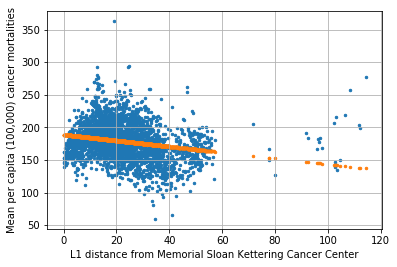

In [32]:
plt.scatter(X36, y, s=6)
plt.scatter(X36, lr.predict(X36), s=6)
plt.grid()
plt.xlabel("L1 distance from Memorial Sloan Kettering Cancer Center", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('mskcc_l1_actual_&_predicted_Y.png')

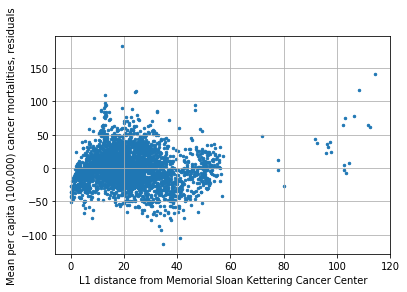

In [33]:
plt.scatter(X36, y - lr.predict(X36), s=6)
plt.grid()
plt.xlabel("L1 distance from Memorial Sloan Kettering Cancer Center", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('mskcc_l1_residuals.png')

In [34]:
X36.shape

(3047, 1)

In [35]:
dfx36 = pd.DataFrame(X36)
dfx36.head()

,0
0,15.026117
1,28.920640
2,4.792963
3,44.967753
4,21.078592


In [36]:
dfx36['mskcc_l1_log'] = np.log(X36)

In [37]:
dfx36.head()

,0,mskcc_l1_log
0,15.026117,2.709790
1,28.920640,3.364556
2,4.792963,1.567149
3,44.967753,3.805946
4,21.078592,3.048258


In [38]:
lr.fit(dfx36, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
lr.score(dfx36, y)

0.06265293053067755

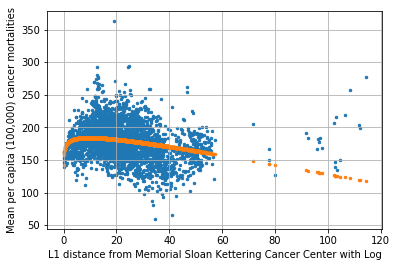

In [40]:
plt.scatter(X36, y, s=6) 
plt.scatter(X36, lr.predict(dfx36), s=6)
plt.grid()
plt.xlabel("L1 distance from Memorial Sloan Kettering Cancer Center with Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('mskcc_l1_log_actual_&_predicted_Y.png')

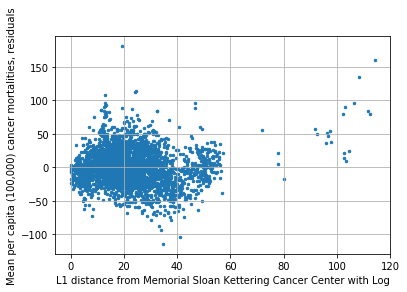

In [41]:
plt.scatter(X36, y - lr.predict(dfx36), s=6)
plt.grid()
plt.xlabel("L1 distance from Memorial Sloan Kettering Cancer Center with Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('mskcc_l1_log_residuals.png')

## 'mayo_l1': L1 distance of county centroids from Mayo Clinic

In [42]:
X['mayo_l1_log'] = np.log(X['mayo_l1'])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
lr.score(X_test, y_test)

0.6258937666267891

The logarithmic version resulted in an increase in accuracy, so it is added to the core feature set.

In [46]:
cancer['mayo_l1_log'] = np.log(cancer['mayo_l1'])

In [47]:
X['mayo_l1_sqrd'] = X['mayo_l1']**2

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
lr.score(X_test, y_test)

0.625896260480986

The squared version also resulted in an increase in accuracy, so it is added to the core feature set.

In [51]:
cancer['mayo_l1_sqrd'] = cancer['mayo_l1']**2

In [52]:
X37 = np.array(cancer['mayo_l1'])
X37 = X37.reshape(-1, 1)

In [53]:
lr.fit(X37, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
lr.score(X37, y)

0.004571152602762973

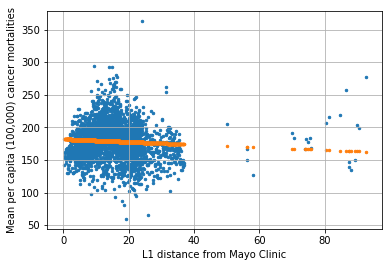

In [55]:
plt.scatter(X37, y, s=6)
plt.scatter(X37, lr.predict(X37), s=6)
plt.grid()
plt.xlabel("L1 distance from Mayo Clinic", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('mayo_l1_actual_&_predicted_Y.png')

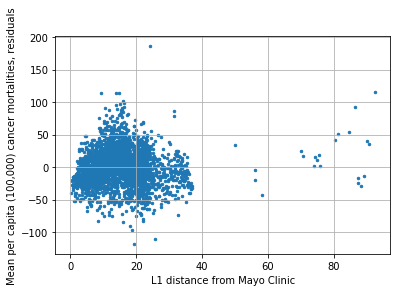

In [56]:
plt.scatter(X37, y - lr.predict(X37), s=6)
plt.grid()
plt.xlabel("L1 distance from Mayo Clinic", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('mayo_l1_residuals.png')

In [57]:
X37.shape

(3047, 1)

In [58]:
dfx37 = pd.DataFrame(X37)
dfx37.head()

,0
0,19.806901
1,13.787466
2,22.966249
3,24.348299
4,4.705036


In [59]:
dfx37['mayo_l1_log'] = np.log(X37)

In [60]:
dfx37.head()

,0,mayo_l1_log
0,19.806901,2.986030
1,13.787466,2.623760
2,22.966249,3.134026
3,24.348299,3.192462
4,4.705036,1.548633


In [61]:
lr.fit(dfx37, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [62]:
lr.score(dfx37, y)

0.022323712410991958

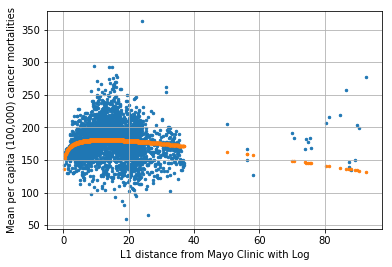

In [63]:
plt.scatter(X37, y, s=6) 
plt.scatter(X37, lr.predict(dfx37), s=6)
plt.grid()
plt.xlabel("L1 distance from Mayo Clinic with Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('mayo_l1_log_actual_&_predicted_Y.png')

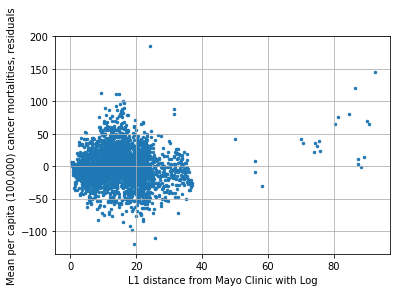

In [64]:
plt.scatter(X37, y - lr.predict(dfx37), s=6)
plt.grid()
plt.xlabel("L1 distance from Mayo Clinic with Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('mayo_l1_log_residuals.png')

In [65]:
dfx37['mayo_l1_sqrd'] = X37**2

In [66]:
dfx37.head()

,0,mayo_l1_log,mayo_l1_sqrd
0,19.806901,2.986030,392.313327
1,13.787466,2.623760,190.094219
2,22.966249,3.134026,527.448593
3,24.348299,3.192462,592.839664
4,4.705036,1.548633,22.137364


In [67]:
lr.fit(dfx37, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [68]:
lr.score(dfx37, y)

0.06564829374878534

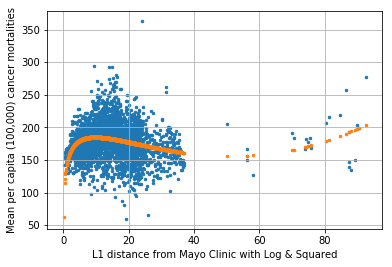

In [69]:
plt.scatter(X37, y, s=6) 
plt.scatter(X37, lr.predict(dfx37), s=6)
plt.grid()
plt.xlabel("L1 distance from Mayo Clinic with Log & Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('mayo_l1_log_sqrd_actual_&_predicted_Y.png')

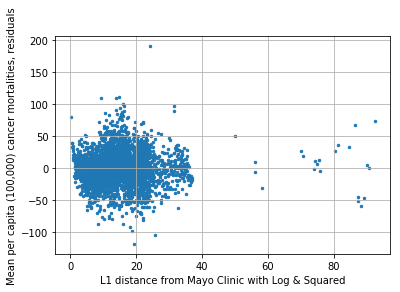

In [70]:
plt.scatter(X37, y - lr.predict(dfx37), s=6)
plt.grid()
plt.xlabel("L1 distance from Mayo Clinic with Log & Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('mayo_l1_log_sqrd_residuals.png')

## 'hopkins_l1': L1 distance of county centroids from Johns Hopkins Hospital

In [71]:
X['hopkins_l1_log'] = np.log(X['hopkins_l1'])

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [74]:
lr.score(X_test, y_test)

0.6258059195176344

The logarithmic version resulted in a decrease in accuracy, so it dropped from X.

In [75]:
X = X.drop(columns = 'hopkins_l1_log')

In [76]:
X['hopkins_l1_sqrd'] = X['hopkins_l1']**2

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [79]:
lr.score(X_test, y_test)

0.6251977231833549

The squared version also resulted in a decrease in accuracy, so it is dropped from X.

In [80]:
X = X.drop(columns = 'hopkins_l1_sqrd')

## 'dfb_l1': L1 distance to Dana Farber/Brigham and Women's Cancer Center

In [81]:
X['dfb_l1_log'] = np.log(X['dfb_l1'])

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [84]:
lr.score(X_test, y_test)

0.6258985685464498

The logarithmic version resulted in an increase in accuracy, so it is added to the core feature set.

In [85]:
cancer['dfb_l1_log'] = np.log(cancer['dfb_l1'])

In [86]:
X['dfb_l1_sqrd'] = X['dfb_l1']**2

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [89]:
lr.score(X_test, y_test)

0.6262100435816907

The squared version also resulted in an increase in accuracy, so it is added to the core feature set.

In [90]:
cancer['dfb_l1_sqrd'] = cancer['dfb_l1']**2

In [91]:
X39 = np.array(cancer['dfb_l1'])
X39 = X39.reshape(-1, 1)

In [92]:
lr.fit(X39, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [93]:
lr.score(X39, y)

0.039047301535303114

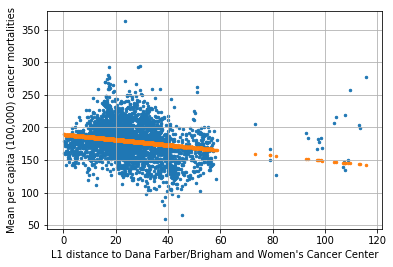

In [94]:
plt.scatter(X39, y, s=6)
plt.scatter(X39, lr.predict(X39), s=6)
plt.grid()
plt.xlabel("L1 distance to Dana Farber/Brigham and Women's Cancer Center", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('dfb_l1_actual_&_predicted_Y.png')

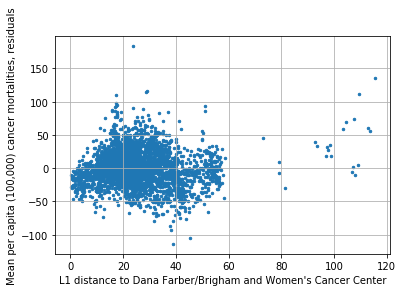

In [95]:
plt.scatter(X39, y - lr.predict(X39), s=6)
plt.grid()
plt.xlabel("L1 distance to Dana Farber/Brigham and Women's Cancer Center", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('dfb_l1_residuals.png')

In [96]:
X39.shape

(3047, 1)

In [97]:
dfx39 = pd.DataFrame(X39)
dfx39.head()

,0
0,19.454317
1,33.348840
2,9.221163
3,46.250153
4,24.378936


In [98]:
dfx39['dfb_l1_log'] = np.log(X39)

In [99]:
dfx39.head()

,0,dfb_l1_log
0,19.454317,2.968069
1,33.348840,3.507023
2,9.221163,2.221501
3,46.250153,3.834065
4,24.378936,3.193719


In [100]:
lr.fit(dfx39, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [101]:
lr.score(dfx39, y)

0.05173621029903375

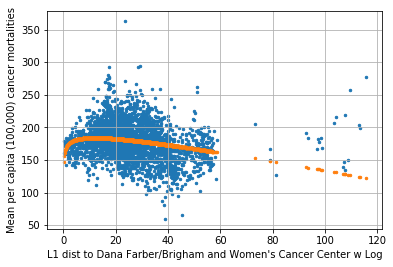

In [102]:
plt.scatter(X39, y, s=6) 
plt.scatter(X39, lr.predict(dfx39), s=6)
plt.grid()
plt.xlabel("L1 dist to Dana Farber/Brigham and Women's Cancer Center w Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('dfb_l1_log_actual_&_predicted_Y.png')

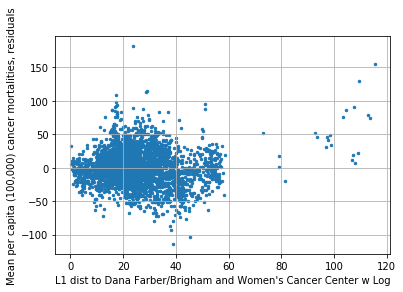

In [103]:
plt.scatter(X39, y - lr.predict(dfx39), s=6)
plt.grid()
plt.xlabel("L1 dist to Dana Farber/Brigham and Women's Cancer Center w Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('dfb_l1_log_residuals.png')

In [104]:
dfx39['dfb_l1_sqrd'] = X39**2

In [105]:
dfx39.head()

,0,dfb_l1_log,dfb_l1_sqrd
0,19.454317,2.968069,378.470450
1,33.348840,3.507023,1112.145129
2,9.221163,2.221501,85.029847
3,46.250153,3.834065,2139.076653
4,24.378936,3.193719,594.332520


In [106]:
lr.fit(dfx39, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [107]:
lr.score(dfx39, y)

0.08932972200125422

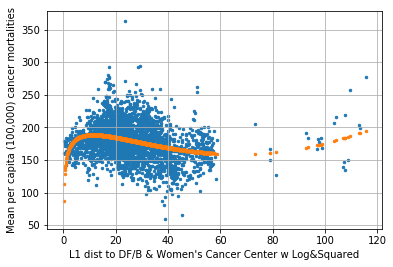

In [108]:
plt.scatter(X39, y, s=6) 
plt.scatter(X39, lr.predict(dfx39), s=6)
plt.grid()
plt.xlabel("L1 dist to DF/B & Women's Cancer Center w Log&Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('dfb_l1_log_sqrd_actual_&_predicted_Y.png')

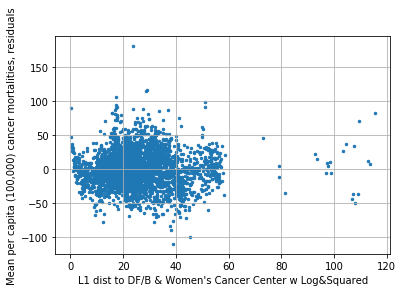

In [109]:
plt.scatter(X39, y - lr.predict(dfx39), s=6)
plt.grid()
plt.xlabel("L1 dist to DF/B & Women's Cancer Center w Log&Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('dfb_l1_log_sqrd_residuals.png')

## 'cleveland_l1': L1 distance to Cleveland Clinic

In [110]:
X['cleveland_l1_log'] = np.log(X['cleveland_l1'])

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [113]:
lr.score(X_test, y_test)

0.6267629974514293

The logarithmic version resulted in an increase in accuracy, so it is added to the core feature set.

In [114]:
cancer['cleveland_l1_log'] = np.log(cancer['cleveland_l1'])

In [115]:
X['cleveland_l1_sqrd'] = X['cleveland_l1']**2

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [118]:
lr.score(X_test, y_test)

0.6297012733243981

The squared version also resulted in an increase in accuracy, so it is added to the core feature set.

In [119]:
cancer['cleveland_l1_sqrd'] = cancer['cleveland_l1']**2

In [120]:
X40 = np.array(cancer['cleveland_l1'])
X40 = X40.reshape(-1, 1)

In [121]:
lr.fit(X40, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [122]:
lr.score(X40, y)

0.06266901673721925

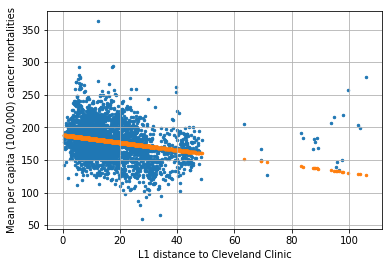

In [123]:
plt.scatter(X40, y, s=6)
plt.scatter(X40, lr.predict(X40), s=6)
plt.grid()
plt.xlabel("L1 distance to Cleveland Clinic", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('cleveland_l1_actual_&_predicted_Y.png')

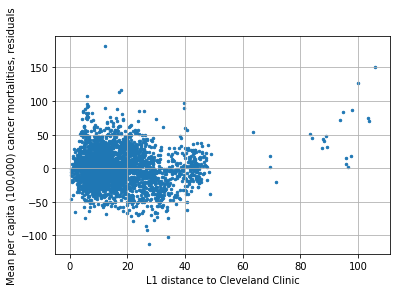

In [124]:
plt.scatter(X40, y - lr.predict(X40), s=6)
plt.grid()
plt.xlabel("L1 distance to Cleveland Clinic", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('cleveland_l1_residuals.png')

In [125]:
X40.shape

(3047, 1)

In [126]:
dfx40 = pd.DataFrame(X40)
dfx40.head()

,0
0,8.107017
1,22.001540
2,9.600649
3,36.571453
4,13.031636


In [127]:
dfx40['cleveland_l1_log'] = np.log(X40)

In [128]:
dfx40.head()

,0,cleveland_l1_log
0,8.107017,2.092730
1,22.001540,3.091112
2,9.600649,2.261831
3,36.571453,3.599268
4,13.031636,2.567380


In [129]:
lr.fit(dfx40, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [130]:
lr.score(dfx40, y)

0.07013596817172285

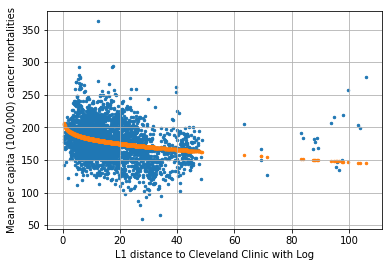

In [131]:
plt.scatter(X40, y, s=6) 
plt.scatter(X40, lr.predict(dfx40), s=6)
plt.grid()
plt.xlabel("L1 distance to Cleveland Clinic with Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('cleveland_l1_log_actual_&_predicted_Y.png')

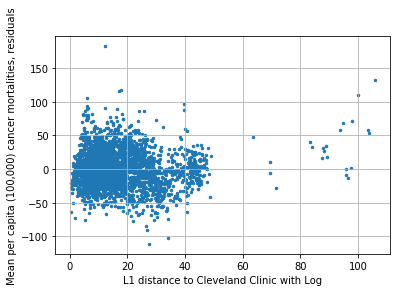

In [132]:
plt.scatter(X40, y - lr.predict(dfx40), s=6)
plt.grid()
plt.xlabel("L1 distance to Cleveland Clinic with Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('cleveland_l1_log_residuals.png')

In [133]:
dfx40['cleveland_l1_sqrd'] = X40**2

In [134]:
dfx40.head()

,0,cleveland_l1_log,cleveland_l1_sqrd
0,8.107017,2.092730,65.723725
1,22.001540,3.091112,484.067762
2,9.600649,2.261831,92.172461
3,36.571453,3.599268,1337.471175
4,13.031636,2.567380,169.823537


In [135]:
lr.fit(dfx40, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [136]:
lr.score(dfx40, y)

0.10330041253990696

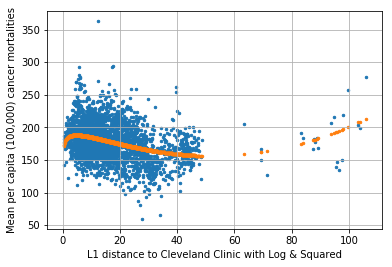

In [137]:
plt.scatter(X40, y, s=6) 
plt.scatter(X40, lr.predict(dfx40), s=6)
plt.grid()
plt.xlabel("L1 distance to Cleveland Clinic with Log & Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('cleveland_l1_log_sqrd_actual_&_predicted_Y.png')

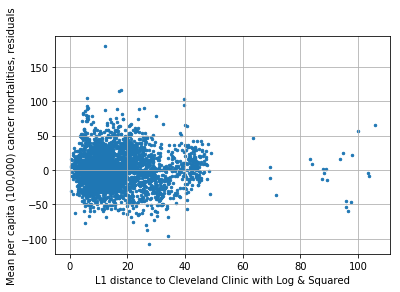

In [138]:
plt.scatter(X40, y - lr.predict(dfx40), s=6)
plt.grid()
plt.xlabel("L1 distance to Cleveland Clinic with Log & Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('cleveland_l1_log_sqrd_residuals.png')

## 'upmcps_l1': L1 distance to UPMC Presbyterian Shadyside

In [139]:
X['upmcps_l1_log'] = np.log(X['upmcps_l1'])

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [141]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [142]:
lr.score(X_test, y_test)

0.6297473959586889

The logarithmic version resulted in an increase in accuracy, so it is added to the core feature set.

In [143]:
cancer['upmcps_l1_log'] = np.log(cancer['upmcps_l1'])

In [144]:
X['upmcps_l1_sqrd'] = X['upmcps_l1']**2

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [147]:
lr.score(X_test, y_test)

0.6275562172909228

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [148]:
X = X.drop(columns = 'upmcps_l1_sqrd')

In [149]:
X41 = np.array(cancer['upmcps_l1'])
X41 = X41.reshape(-1, 1)

In [150]:
lr.fit(X41, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [151]:
lr.score(X41, y)

0.06531927433633844

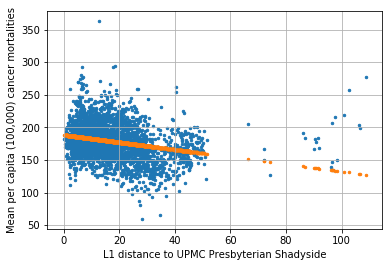

In [152]:
plt.scatter(X41, y, s=6)
plt.scatter(X41, lr.predict(X41), s=6)
plt.grid()
plt.xlabel("L1 distance to UPMC Presbyterian Shadyside", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('upmcps_l1_actual_&_predicted_Y.png')

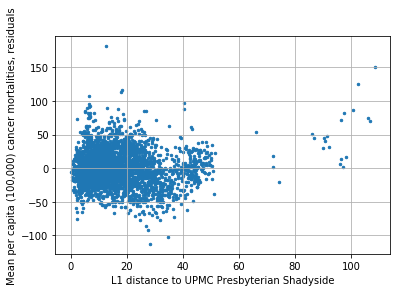

In [153]:
plt.scatter(X41, y - lr.predict(X41), s=6)
plt.grid()
plt.xlabel("L1 distance to UPMC Presbyterian Shadyside", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('upmcps_l1_residuals.png')

In [154]:
X41.shape

(3047, 1)

In [155]:
dfx41 = pd.DataFrame(X41)
dfx41.head()

,0
0,8.706317
1,22.600840
2,6.879149
3,39.292953
4,15.403792


In [156]:
dfx41['upmcps_l1_log'] = np.log(X41)

In [157]:
dfx41.head()

,0,upmcps_l1_log
0,8.706317,2.164049
1,22.600840,3.117987
2,6.879149,1.928495
3,39.292953,3.671045
4,15.403792,2.734614


In [158]:
lr.fit(dfx41, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [159]:
lr.score(dfx41, y)

0.06733879682077226

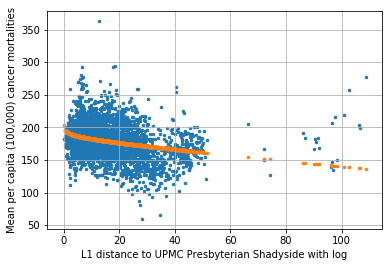

In [160]:
plt.scatter(X41, y, s=6) 
plt.scatter(X41, lr.predict(dfx41), s=6)
plt.grid()
plt.xlabel("L1 distance to UPMC Presbyterian Shadyside with log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('upmcps_l1_log_actual_&_predicted_Y.png')

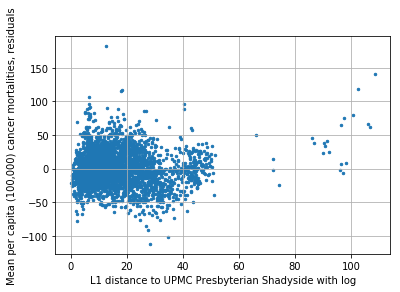

In [161]:
plt.scatter(X41, y - lr.predict(dfx41), s=6)
plt.grid()
plt.xlabel("L1 distance to UPMC Presbyterian Shadyside with log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('upmcps_l1_log_residuals.png')

## 'hlmcc_l1': L1 distance to H. Lee Moffitt Cancer Center and Research Institute

In [162]:
X['hlmcc_l1_log'] = np.log(X['hlmcc_l1'])

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [164]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [165]:
lr.score(X_test, y_test)

0.6291479686078638

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [166]:
X = X.drop(columns = 'hlmcc_l1_log')

In [167]:
X['hlmcc_l1_sqrd'] = X['hlmcc_l1']**2

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [169]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [170]:
lr.score(X_test, y_test)

0.6260738654235171

The squared version also resulted in a decrease in accuracy, so it is dropped from X.

In [171]:
X = X.drop(columns = 'hlmcc_l1_sqrd')

## 'mgs_l1': L1 distance to Massachusetts General Hospital

In [172]:
X['mgs_l1_log'] = np.log(X['mgs_l1'])

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [174]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [175]:
lr.score(X_test, y_test)

0.6298870910771265

The logarithmic version resulted in an increase in accuracy, so it is added to the core feature set.

In [176]:
cancer['mgs_l1_log'] = np.log(cancer['mgs_l1'])

In [177]:
X['mgs_l1_sqrd'] = X['mgs_l1']**2

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [179]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [180]:
lr.score(X_test, y_test)

0.6287807092200273

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [181]:
X = X.drop(columns = 'mgs_l1_sqrd')

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [183]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [184]:
lr.score(X_test, y_test)

0.6298870910771265

In [185]:
X43 = np.array(cancer['mgs_l1'])
X43 = X43.reshape(-1, 1)

In [186]:
lr.fit(X43, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [187]:
lr.score(X43, y)

0.03892936593929819

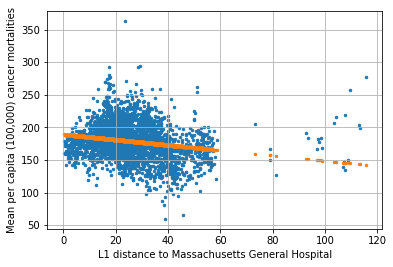

In [188]:
plt.scatter(X43, y, s=6)
plt.scatter(X43, lr.predict(X43), s=6)
plt.grid()
plt.xlabel("L1 distance to Massachusetts General Hospital", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('mgs_l1_actual_&_predicted_Y.png')

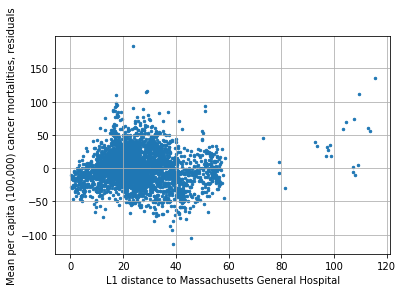

In [189]:
plt.scatter(X43, y - lr.predict(X43), s=6)
plt.grid()
plt.xlabel("L1 distance to Massachusetts General Hospital", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('mgs_l1_residuals.png')

In [190]:
X43.shape

(3047, 1)

In [191]:
dfx43 = pd.DataFrame(X43)
dfx43.head()

,0
0,19.520017
1,33.414540
2,9.286863
3,46.265653
4,24.444636


In [192]:
dfx43['mgs_l1_log'] = np.log(X43)

In [193]:
dfx43.head()

,0,mgs_l1_log
0,19.520017,2.971440
1,33.414540,3.508991
2,9.286863,2.228601
3,46.265653,3.834400
4,24.444636,3.196411


In [194]:
lr.fit(dfx43, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [195]:
lr.score(dfx43, y)

0.051506636945839346

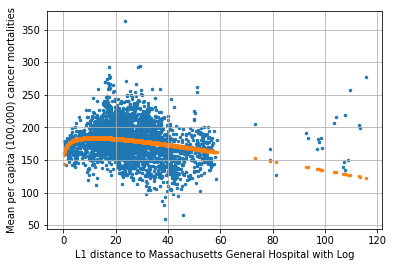

In [196]:
plt.scatter(X43, y, s=6) 
plt.scatter(X43, lr.predict(dfx43), s=6)
plt.grid()
plt.xlabel("L1 distance to Massachusetts General Hospital with Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('mgs_l1_log_actual_&_predicted_Y.png')

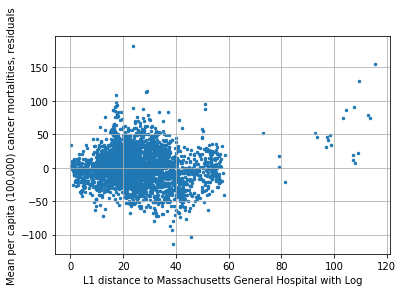

In [197]:
plt.scatter(X43, y - lr.predict(dfx43), s=6)
plt.grid()
plt.xlabel("L1 distance to Massachusetts General Hospital with Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('mgs_l1_log_residuals.png')

## 'nw_mem_l1': L1 distance to Northwestern Memorial Hospital

In [198]:
X['nw_mem_l1_log'] = np.log(X['nw_mem_l1'])

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [200]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [201]:
lr.score(X_test, y_test)

0.6298695505888197

The logarithmic version resulted in a decrease in accuracy, so it is dropped from the core feature set.

In [202]:
X = X.drop(columns = 'nw_mem_l1_log')

In [203]:
X['nw_mem_l1_sqrd'] = X['nw_mem_l1']**2

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [205]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [206]:
lr.score(X_test, y_test)

0.6263611012543251

The squared version also resulted in a decrease in accuracy, so it is dropped from X.

In [207]:
X = X.drop(columns = 'nw_mem_l1_sqrd')

## 'chi_l1': L1 distance of county centroids from Chicago

In [208]:
X['chi_l1_log'] = np.log(X['chi_l1'])

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [210]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [211]:
lr.score(X_test, y_test)

0.6298764764181636

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [212]:
X = X.drop(columns = 'chi_l1_log')

In [213]:
X['chi_l1_sqrd'] = X['chi_l1']**2

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [215]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [216]:
lr.score(X_test, y_test)

0.6264026060370316

The squared version also resulted in a decrease in accuracy, so it is dropped from X.

In [217]:
X = X.drop(columns = 'chi_l1_sqrd')

## 'nyc_l1': L1 distance of county centroids from New York City

In [218]:
X['nyc_l1_log'] = np.log(X['nyc_l1'])

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [220]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [221]:
lr.score(X_test, y_test)

0.5874171715316941

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [222]:
X = X.drop(columns = 'nyc_l1_log')

In [223]:
X['nyc_l1_sqrd'] = X['nyc_l1']**2

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [225]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [226]:
lr.score(X_test, y_test)

0.6265644788693446

The squared version also resulted in a decrease in accuracy, so it is dropped from X.

In [227]:
X = X.drop(columns = 'nyc_l1_sqrd')

## 'atlanta_l1': L1 distance of county centroids from Atlanta

In [228]:
X['atlanta_l1_log'] = np.log(X['atlanta_l1'])

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [230]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [231]:
lr.score(X_test, y_test)

0.6322197249392397

The logarithmic version resulted in an increase in accuracy, so it is added to the core feature set.

In [232]:
cancer['atlanta_l1_log'] = np.log(cancer['atlanta_l1'])

In [233]:
X['atlanta_l1_sqrd'] = X['atlanta_l1']**2

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [235]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [236]:
lr.score(X_test, y_test)

0.6322183081822753

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [237]:
X = X.drop(columns = 'atlanta_l1_sqrd')

In [238]:
X47 = np.array(cancer['atlanta_l1'])
X47 = X47.reshape(-1, 1)

In [239]:
lr.fit(X47, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [240]:
lr.score(X47, y)

0.11915263281193776

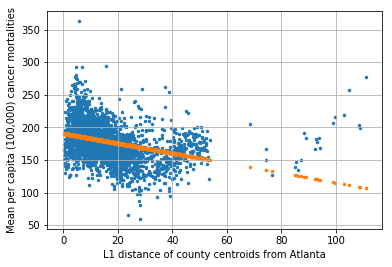

In [241]:
plt.scatter(X47, y, s=6)
plt.scatter(X47, lr.predict(X47), s=6)
plt.grid()
plt.xlabel("L1 distance of county centroids from Atlanta", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('atlanta_l1_actual_&_predicted_Y.png')

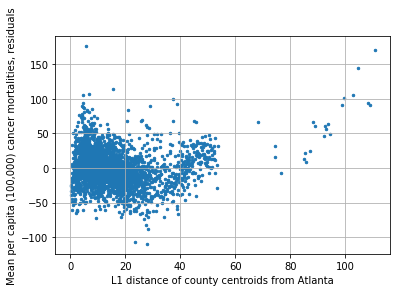

In [242]:
plt.scatter(X47, y - lr.predict(X47), s=6)
plt.grid()
plt.xlabel("L1 distance of county centroids from Atlanta", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('atlanta_l1_residuals.png')

In [243]:
X47.shape

(3047, 1)

In [244]:
dfx47 = pd.DataFrame(X47)
dfx47.head()

,0
0,2.413983
1,11.480540
2,12.647137
3,41.558853
4,17.669692


In [245]:
dfx47['atlanta_l1_log'] = np.log(X47)

In [246]:
dfx47.head()

,0,atlanta_l1_log
0,2.413983,0.881278
1,11.480540,2.440653
2,12.647137,2.537431
3,41.558853,3.727111
4,17.669692,2.871851


In [247]:
lr.fit(dfx47, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [248]:
lr.score(dfx47, y)

0.14904219951148645

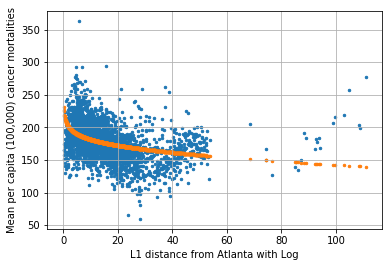

In [249]:
plt.scatter(X47, y, s=6) 
plt.scatter(X47, lr.predict(dfx47), s=6)
plt.grid()
plt.xlabel("L1 distance from Atlanta with Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('atlanta_l1_log_actual_&_predicted_Y.png')

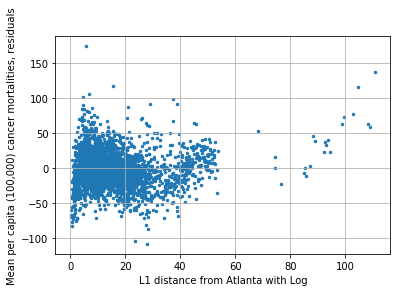

In [250]:
plt.scatter(X47, y - lr.predict(dfx47), s=6)
plt.grid()
plt.xlabel("L1 distance from Atlanta with Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('atlanta_l1_log_residuals.png')

## 'dallas_l1': L1 distance of county centroids from Dallas

In [251]:
X['dallas_l1_log'] = np.log(X['dallas_l1'])

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [253]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [254]:
lr.score(X_test, y_test)

0.6318139499795787

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [255]:
X = X.drop(columns = 'dallas_l1_log')

In [256]:
X['dallas_l1_sqrd'] = X['dallas_l1']**2

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [258]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [259]:
lr.score(X_test, y_test)

0.6315249413745794

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [260]:
X = X.drop(columns = 'dallas_l1_sqrd')

## 'denver_l1': L1 distance of county centroids from Denver

In [261]:
X['denver_l1_log'] = np.log(X['denver_l1'])

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [263]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [264]:
lr.score(X_test, y_test)

0.6316156814768568

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [265]:
X = X.drop(columns = 'denver_l1_log')

In [266]:
X['denver_l1_sqrd'] = X['denver_l1']**2

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [268]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [269]:
lr.score(X_test, y_test)

0.6330893542765623

The squared version resulted in an increase in accuracy, so it is added to the core feature set.

In [270]:
cancer['denver_l1_sqrd'] = cancer['denver_l1']**2

In [271]:
X49 = np.array(cancer['denver_l1'])
X49 = X49.reshape(-1, 1)

In [272]:
lr.fit(X49, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [273]:
lr.score(X49, y)

0.05601706994982669

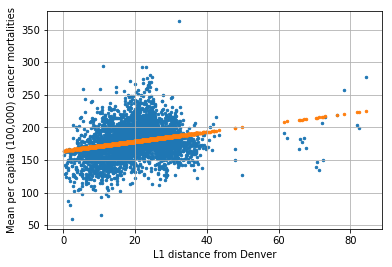

In [275]:
plt.scatter(X49, y, s=6)
plt.scatter(X49, lr.predict(X49), s=6)
plt.grid()
plt.xlabel("L1 distance from Denver", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('denver_l1_actual_&_predicted_Y.png')

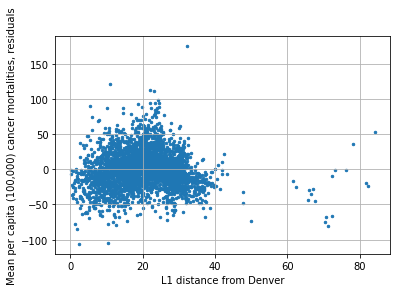

In [276]:
plt.scatter(X49, y - lr.predict(X49), s=6)
plt.grid()
plt.xlabel("L1 distance from Denver", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('denver_l1_residuals.png')

In [277]:
X49.shape

(3047, 1)

In [278]:
dfx49 = pd.DataFrame(X49)
dfx49.head()

,0
0,28.046401
1,22.026966
2,31.205749
3,14.966353
4,12.101464


In [279]:
dfx49['denver_l1_sqrd'] = X49**2

In [280]:
dfx49.head()

,0,denver_l1_sqrd
0,28.046401,786.600609
1,22.026966,485.187231
2,31.205749,973.798771
3,14.966353,223.991722
4,12.101464,146.445431


In [281]:
lr.fit(dfx49, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [282]:
lr.score(dfx49, y)

0.08529349686687226

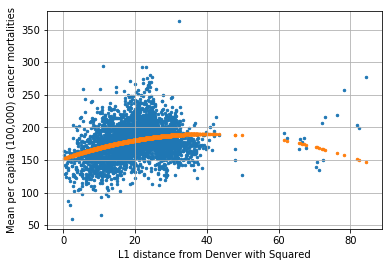

In [283]:
plt.scatter(X49, y, s=6) 
plt.scatter(X49, lr.predict(dfx49), s=6)
plt.grid()
plt.xlabel("L1 distance from Denver with Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('denver_l1_sqrd_actual_&_predicted_Y.png')

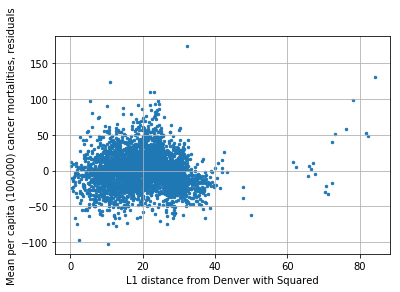

In [284]:
plt.scatter(X49, y - lr.predict(dfx49), s=6)
plt.grid()
plt.xlabel("L1 distance from Denver with Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('denver_l1_sqrd_residuals.png')

## 'los_ang_l1': L1 distance of county centroids from Los Angeles

In [285]:
X['los_ang_l1_log'] = np.log(X['los_ang_l1'])

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [287]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [288]:
lr.score(X_test, y_test)

0.6299336371110468

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [289]:
X = X.drop(columns = 'los_ang_l1_log')

In [290]:
X['los_ang_l1_sqrd'] = X['los_ang_l1']**2

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [292]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [293]:
lr.score(X_test, y_test)

0.6337270287193825

The squared version resulted in an increase in accuracy, so it is added to the core feature set.

In [294]:
cancer['los_ang_l1_sqrd'] = cancer['los_ang_l1']**2

In [295]:
X50 = np.array(cancer['los_ang_l1'])
X50 = X50.reshape(-1, 1)

In [296]:
lr.fit(X50, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [297]:
lr.score(X50, y)

0.04675244157350278

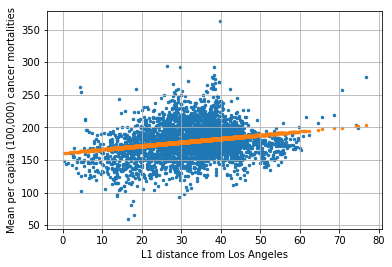

In [298]:
plt.scatter(X50, y, s=6)
plt.scatter(X50, lr.predict(X50), s=6)
plt.grid()
plt.xlabel("L1 distance from Los Angeles", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('los_ang_l1_actual_&_predicted_Y.png')

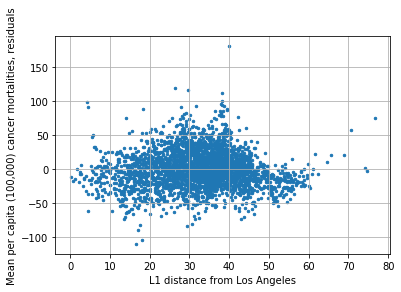

In [299]:
plt.scatter(X50, y - lr.predict(X50), s=6)
plt.grid()
plt.xlabel("L1 distance from Los Angeles", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('los_ang_l1_residuals.png')

In [300]:
X50.shape

(3047, 1)

In [301]:
dfx50 = pd.DataFrame(X50)
dfx50.head()

,0
0,35.966483
1,29.593366
2,46.199637
3,11.398601
4,31.041864


In [302]:
dfx50['los_ang_l1_sqrd'] = X50**2

In [303]:
dfx50.head()

,0,los_ang_l1_sqrd
0,35.966483,1293.587899
1,29.593366,875.767311
2,46.199637,2134.406459
3,11.398601,129.928105
4,31.041864,963.597321


In [304]:
lr.fit(dfx50, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [305]:
lr.score(dfx50, y)

0.08392379655613724

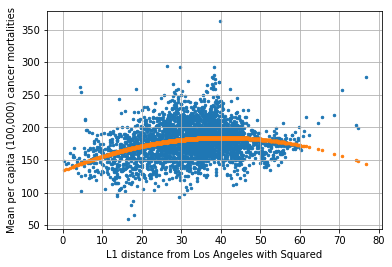

In [308]:
plt.scatter(X50, y, s=6) 
plt.scatter(X50, lr.predict(dfx50), s=6)
plt.grid()
plt.xlabel("L1 distance from Los Angeles with Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('los_ang_l1_log_actual_&_predicted_Y.png')

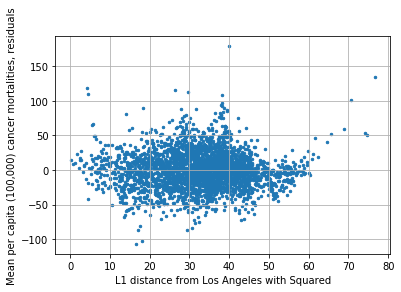

In [309]:
plt.scatter(X50, y - lr.predict(dfx50), s=6)
plt.grid()
plt.xlabel("L1 distance from Los Angeles with Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('los_ang_l1_sqrd_residuals.png')

## 'seattle_l1': L1 distance of county centroids from Seattle

In [310]:
X['seattle_l1_log'] = np.log(X['seattle_l1'])

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [312]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [313]:
lr.score(X_test, y_test)

0.6341588382382451

The logarithmic version resulted in an increase in accuracy, so it is added to the core feature set.

In [314]:
cancer['seattle_l1_log'] = np.log(cancer['seattle_l1'])

In [315]:
X['seattle_l1_sqrd'] = X['seattle_l1']**2

In [316]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [317]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [318]:
lr.score(X_test, y_test)

0.62939111784136

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [319]:
X = X.drop(columns = 'seattle_l1_sqrd')

In [320]:
X51 = np.array(cancer['seattle_l1'])
X51 = X51.reshape(-1, 1)

In [321]:
lr.fit(X51, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [322]:
lr.score(X51, y)

0.1166290651190316

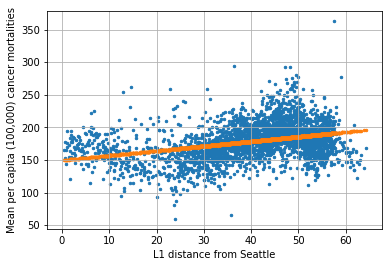

In [323]:
plt.scatter(X51, y, s=6)
plt.scatter(X51, lr.predict(X51), s=6)
plt.grid()
plt.xlabel("L1 distance from Seattle", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('seattle_l1_actual_&_predicted_Y.png')

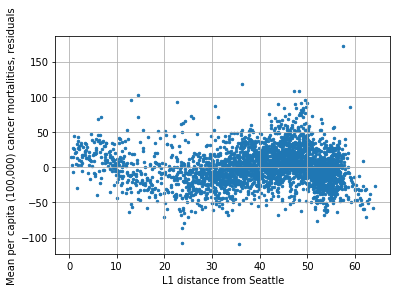

In [324]:
plt.scatter(X51, y - lr.predict(X51), s=6)
plt.grid()
plt.xlabel("L1 distance from Seattle", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('seattle_l1_residuals.png')

In [325]:
X51.shape

(3047, 1)

In [326]:
dfx51 = pd.DataFrame(X51)
dfx51.head()

,0
0,53.255201
1,47.235766
2,56.414549
3,10.242447
4,34.131608


In [327]:
dfx51['seattle_l1_log'] = np.log(X51)

In [328]:
dfx51.head()

,0,seattle_l1_log
0,53.255201,3.975095
1,47.235766,3.855151
2,56.414549,4.032727
3,10.242447,2.326541
4,34.131608,3.530224


In [329]:
lr.fit(dfx51, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [330]:
lr.score(dfx51, y)

0.12361414035008

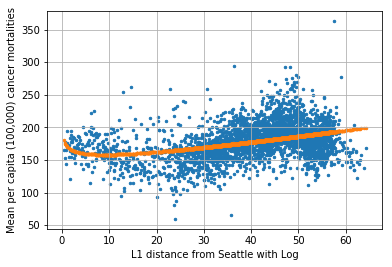

In [331]:
plt.scatter(X51, y, s=6) 
plt.scatter(X51, lr.predict(dfx51), s=6)
plt.grid()
plt.xlabel("L1 distance from Seattle with Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('seattle_l1_log_actual_&_predicted_Y.png')

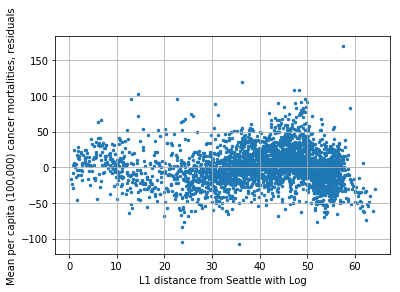

In [332]:
plt.scatter(X51, y - lr.predict(dfx51), s=6)
plt.grid()
plt.xlabel("L1 distance from Seattle with Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('seattle_l1_log_residuals.png')

## 'san_fran_l1': L1 distance of county centroids from San Francisco

In [333]:
X['san_fran_l1_log'] = np.log(X['san_fran_l1'])

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [335]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [336]:
lr.score(X_test, y_test)

0.6333616219164959

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [337]:
X = X.drop(columns = 'san_fran_l1_log')

In [338]:
X['san_fran_l1_sqrd'] = X['san_fran_l1']**2

In [339]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [340]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [341]:
lr.score(X_test, y_test)

0.633433891885113

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [342]:
X = X.drop(columns = 'san_fran_l1_sqrd')

## 'utmda_l2': L2 distance of county centroids from University of Texas MD Anderson Cancer Center

In [343]:
X['utmda_l2_log'] = np.log(X['utmda_l2'])

In [344]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [345]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [346]:
lr.score(X_test, y_test)

0.6341037652416055

The logarithmic version resulted in a decrease in accuracy, so it is dropped from the core feature set.

In [347]:
X = X.drop(columns = 'utmda_l2_log')

In [348]:
X['utmda_l2_sqrd'] = X['utmda_l2']**2

In [349]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [350]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [351]:
lr.score(X_test, y_test)

0.5234309494260708

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [352]:
X = X.drop(columns = 'utmda_l2_sqrd')

## 'mskcc_l2': L2 distance of county centroids from Memorial Sloan Kettering Cancer Center

In [353]:
X['mskcc_l2_log'] = np.log(X['mskcc_l2'])

In [354]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [355]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [356]:
lr.score(X_test, y_test)

0.6324262457192211

The logarithmic version resulted in a decrease in accuracy, so it is dropped from the core feature set.

In [357]:
X = X.drop(columns = 'mskcc_l2_log')

In [358]:
X['mskcc_l2_sqrd'] = X['mskcc_l2']**2

In [359]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [360]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [361]:
lr.score(X_test, y_test)

0.5234309481138406

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [362]:
X = X.drop(columns = 'mskcc_l2_sqrd')

## 'mayo_l2': L2 distance of county centroids from Mayo Clinic

In [363]:
X['mayo_l2_log'] = np.log(X['mayo_l2'])

In [364]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [365]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [366]:
lr.score(X_test, y_test)

0.6329009969713938

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [367]:
X = X.drop(columns = 'mayo_l2_log')

In [368]:
X['mayo_l2_sqrd'] = X['mayo_l2']**2

In [369]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [370]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [371]:
lr.score(X_test, y_test)

0.5234309470958871

The squared version also resulted in a decrease in accuracy, so it is dropped from X.

In [372]:
X = X.drop(columns = 'mayo_l2_sqrd')

## 'hopkins_l2': L2 distance of county centroids from Johns Hopkins Hospital

In [373]:
X['hopkins_l2_log'] = np.log(X['hopkins_l2'])

In [374]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [375]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [376]:
lr.score(X_test, y_test)

0.6344455723060647

The logarithmic version resulted in an increase in accuracy, so it is added to the core feature set.

In [377]:
cancer['hopkins_l2_log'] = np.log(cancer['hopkins_l2'])

In [378]:
X['hopkins_l2_sqrd'] = X['hopkins_l2']**2

In [379]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [380]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [381]:
lr.score(X_test, y_test)

0.5231790432625192

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [382]:
X = X.drop(columns = 'hopkins_l2_sqrd')

In [383]:
X56 = np.array(cancer['hopkins_l2'])
X56 = X56.reshape(-1, 1)

In [384]:
lr.fit(X56, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [385]:
lr.score(X56, y)

0.0780165611218484

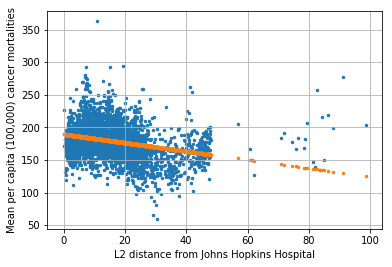

In [388]:
plt.scatter(X56, y, s=6)
plt.scatter(X56, lr.predict(X56), s=6)
plt.grid()
plt.xlabel("L2 distance from Johns Hopkins Hospital", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('hopkins_l2_actual_&_predicted_Y.png')

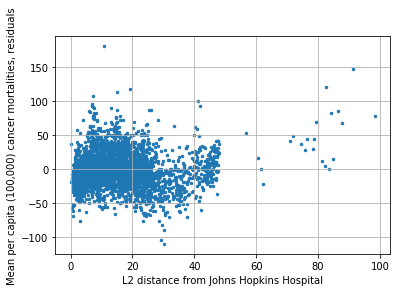

In [389]:
plt.scatter(X56, y - lr.predict(X56), s=6)
plt.grid()
plt.xlabel("L2 distance from Johns Hopkins Hospital", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('hopkins_l2_residuals.png')

In [390]:
X56.shape

(3047, 1)

In [391]:
dfx56 = pd.DataFrame(X56)
dfx56.head()

,0
0,7.748334
1,18.202018
2,1.743634
3,39.868754
4,18.000504


In [392]:
dfx56['hopkins_l2_log'] = np.log(X56)

In [393]:
dfx56.head()

,0,hopkins_l2_log
0,7.748334,2.047478
1,18.202018,2.901532
2,1.743634,0.555972
3,39.868754,3.685593
4,18.000504,2.890400


In [394]:
lr.fit(dfx56, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [395]:
lr.score(dfx56, y)

0.0810481755043384

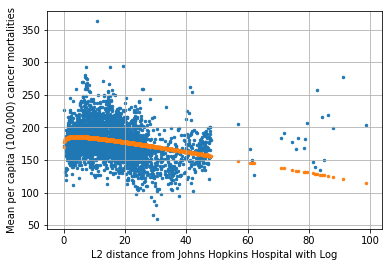

In [396]:
plt.scatter(X56, y, s=6) 
plt.scatter(X56, lr.predict(dfx56), s=6)
plt.grid()
plt.xlabel("L2 distance from Johns Hopkins Hospital with Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('hopkins_l2_log_actual_&_predicted_Y.png')

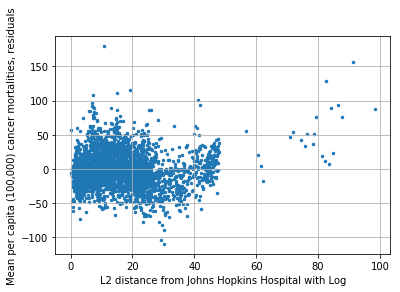

In [397]:
plt.scatter(X56, y - lr.predict(dfx56), s=6)
plt.grid()
plt.xlabel("L2 distance from Johns Hopkins Hospital with Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('hopkins_l2_log_residuals.png')

## 'dfb_l2': L2 distance to Dana Farber/Brigham and Women's Cancer Center

In [398]:
X['dfb_l2_log'] = np.log(X['dfb_l2'])

In [399]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [400]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [401]:
lr.score(X_test, y_test)

0.634809892081734

The logarithmic version resulted in an increase in accuracy, so it is added to the core feature set.

In [402]:
cancer['dfb_l2_log'] = np.log(cancer['dfb_l2'])

In [403]:
X['dfb_l2_sqrd'] = X['dfb_l2']**2

In [404]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [405]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [406]:
lr.score(X_test, y_test)

0.5077480958669458

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [407]:
X = X.drop(columns = 'dfb_l2_sqrd')

In [408]:
X57 = np.array(cancer['dfb_l2'])
X57 = X57.reshape(-1, 1)

In [409]:
lr.fit(X57, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [410]:
lr.score(X57, y)

0.06309406685804708

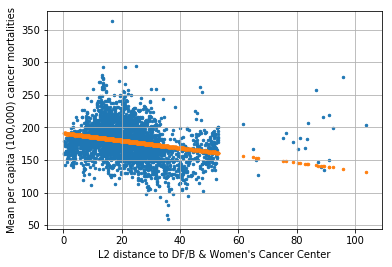

In [411]:
plt.scatter(X57, y, s=6)
plt.scatter(X57, lr.predict(X57), s=6)
plt.grid()
plt.xlabel("L2 distance to DF/B & Women's Cancer Center", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('dfb_l2_actual_&_predicted_Y.png')

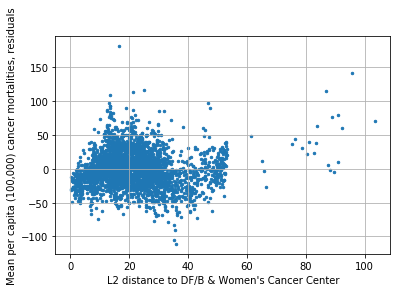

In [412]:
plt.scatter(X57, y - lr.predict(X57), s=6)
plt.grid()
plt.xlabel("L2 distance to DF/B & Women's Cancer Center", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('dfb_l2_residuals.png')

In [413]:
X57.shape

(3047, 1)

In [414]:
dfx57 = pd.DataFrame(X57)
dfx57.head()

,0
0,13.945451
1,24.472782
2,6.520580
3,45.149921
4,23.391734


In [415]:
dfx57['dfb_l2_log'] = np.log(X57)

In [416]:
dfx57.head()

,0,dfb_l2_log
0,13.945451,2.635153
1,24.472782,3.197562
2,6.520580,1.874963
3,45.149921,3.809989
4,23.391734,3.152383


In [417]:
lr.fit(dfx57, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [418]:
lr.score(dfx57, y)

0.0774795396181982

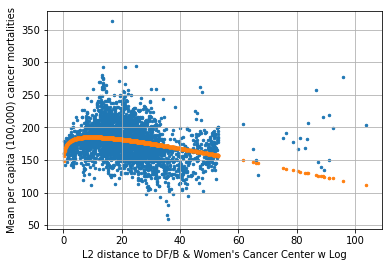

In [419]:
plt.scatter(X57, y, s=6) 
plt.scatter(X57, lr.predict(dfx57), s=6)
plt.grid()
plt.xlabel("L2 distance to DF/B & Women's Cancer Center w Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('dfb_l2_log_actual_&_predicted_Y.png')

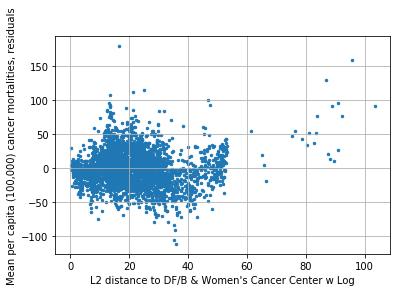

In [420]:
plt.scatter(X57, y - lr.predict(dfx57), s=6)
plt.grid()
plt.xlabel("L2 distance to DF/B & Women's Cancer Center w Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('dfb_l2_log_residuals.png')

## 'cleveland_l2': L2 distance to Cleveland Clinic

In [421]:
X['cleveland_l2_log'] = np.log(X['cleveland_l2'])

In [422]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [423]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [424]:
lr.score(X_test, y_test)

0.6348744989122823

The logarithmic version resulted in an increase in accuracy, so it is added to the core feature set.

In [425]:
cancer['cleveland_l2_log'] = np.log(cancer['cleveland_l2'])

In [426]:
X['cleveland_l2_sqrd'] = X['cleveland_l2']**2

In [427]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [428]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [429]:
lr.score(X_test, y_test)

0.49882589976959446

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [430]:
X = X.drop(columns = 'cleveland_l2_sqrd')

In [431]:
X58 = np.array(cancer['cleveland_l2'])
X58 = X58.reshape(-1, 1)

In [432]:
lr.fit(X58, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [433]:
lr.score(X58, y)

0.0830129619144504

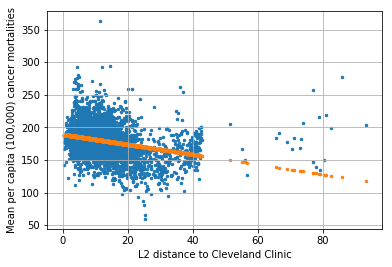

In [434]:
plt.scatter(X58, y, s=6)
plt.scatter(X58, lr.predict(X58), s=6)
plt.grid()
plt.xlabel("L2 distance to Cleveland Clinic", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('cleveland_l2_actual_&_predicted_Y.png')

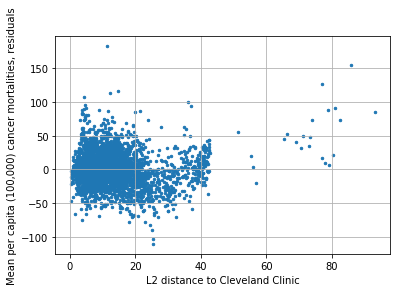

In [435]:
plt.scatter(X58, y - lr.predict(X58), s=6)
plt.grid()
plt.xlabel("L2 distance to Cleveland Clinic", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('cleveland_l2_residuals.png')

In [436]:
X58.shape

(3047, 1)

In [437]:
dfx58 = pd.DataFrame(X58)
dfx58.head()

,0
0,7.321683
1,15.560298
2,6.953162
3,34.677948
4,12.858150


In [438]:
dfx58['cleveland_l2_log'] = np.log(X58)

In [439]:
dfx58.head()

,0,cleveland_l2_log
0,7.321683,1.990840
1,15.560298,2.744723
2,6.953162,1.939197
3,34.677948,3.546104
4,12.858150,2.553978


In [440]:
lr.fit(dfx58, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [441]:
lr.score(dfx58, y)

0.0931635076737155

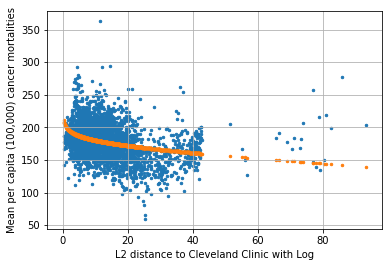

In [442]:
plt.scatter(X58, y, s=6) 
plt.scatter(X58, lr.predict(dfx58), s=6)
plt.grid()
plt.xlabel("L2 distance to Cleveland Clinic with Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('cleveland_l2_log_actual_&_predicted_Y.png')

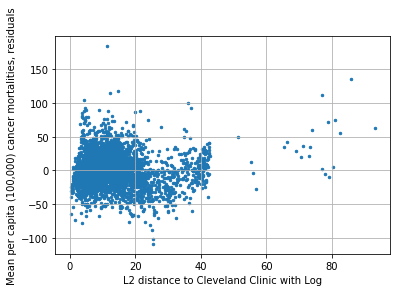

In [443]:
plt.scatter(X58, y - lr.predict(dfx58), s=6)
plt.grid()
plt.xlabel("L2 distance to Cleveland Clinic with Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('cleveland_l2_log_residuals.png')

## 'upmcps_l2': L2 distance to UPMC Presbyterian Shadyside

In [444]:
X['upmcps_l2_log'] = np.log(X['upmcps_l2'])

In [445]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [446]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [447]:
lr.score(X_test, y_test)

0.6352551036241595

The logarithmic version resulted in an increase in accuracy, so it is added to the core feature set.

In [448]:
cancer['upmcps_l2_log'] = np.log(cancer['upmcps_l2'])

In [449]:
X['upmcps_l2_sqrd'] = X['upmcps_l2']**2

In [450]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [451]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [452]:
lr.score(X_test, y_test)

0.4971084050266532

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [453]:
X = X.drop(columns = 'upmcps_l2_sqrd')

In [454]:
X59 = np.array(cancer['upmcps_l2'])
X59 = X59.reshape(-1, 1)

In [455]:
lr.fit(X59, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [456]:
lr.score(X59, y)

0.08463532536138774

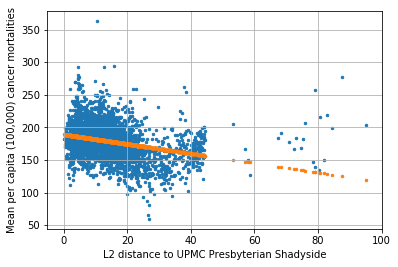

In [457]:
plt.scatter(X59, y, s=6)
plt.scatter(X59, lr.predict(X59), s=6)
plt.grid()
plt.xlabel("L2 distance to UPMC Presbyterian Shadyside", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('upmcps_l2_actual_&_predicted_Y.png')

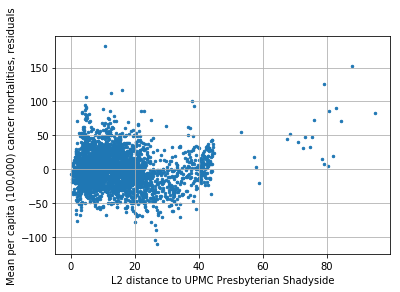

In [458]:
plt.scatter(X59, y - lr.predict(X59), s=6)
plt.grid()
plt.xlabel("L2 distance to UPMC Presbyterian Shadyside", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('upmcps_l2_residuals.png')

In [459]:
X59.shape

(3047, 1)

In [460]:
dfx59 = pd.DataFrame(X59)
dfx59.head()

,0
0,6.694657
1,16.063721
2,4.982666
3,36.408162
4,14.544401


In [461]:
dfx59['upmcps_l2_log'] = np.log(X59)

In [462]:
dfx59.head()

,0,upmcps_l2_log
0,6.694657,1.901310
1,16.063721,2.776563
2,4.982666,1.605965
3,36.408162,3.594793
4,14.544401,2.677206


In [463]:
lr.fit(dfx59, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [464]:
lr.score(dfx59, y)

0.08758222963538087

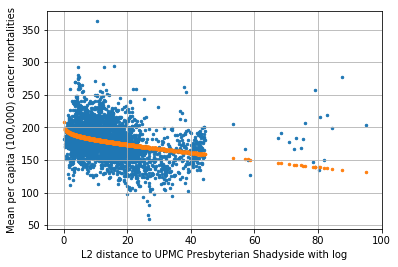

In [465]:
plt.scatter(X59, y, s=6) 
plt.scatter(X59, lr.predict(dfx59), s=6)
plt.grid()
plt.xlabel("L2 distance to UPMC Presbyterian Shadyside with log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('upmcps_l2_log_actual_&_predicted_Y.png')

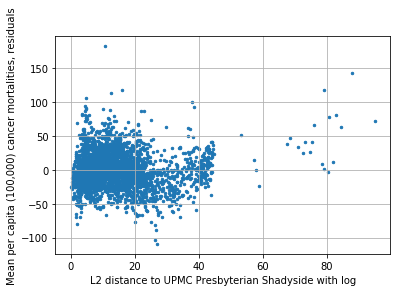

In [466]:
plt.scatter(X59, y - lr.predict(dfx59), s=6)
plt.grid()
plt.xlabel("L2 distance to UPMC Presbyterian Shadyside with log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('upmcps_l2_log_residuals.png')

## 'hlmcc_l2': L2 distance to H. Lee Moffitt Cancer Center and Research Institute

In [467]:
X['hlmcc_l2_log'] = np.log(X['hlmcc_l2'])

In [468]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [469]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [470]:
lr.score(X_test, y_test)

0.6343188375904055

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [471]:
X = X.drop(columns = 'hlmcc_l2_log')

In [472]:
X['hlmcc_l2_sqrd'] = X['hlmcc_l2']**2

In [473]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [474]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [475]:
lr.score(X_test, y_test)

0.49710841246397264

The squared version also resulted in a decrease in accuracy, so it is dropped from X.

In [476]:
X = X.drop(columns = 'hlmcc_l2_sqrd')

## 'mgs_l2': L2 distance to Massachusetts General Hospital

In [477]:
X['mgs_l2_log'] = np.log(X['mgs_l2'])

In [478]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [479]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [480]:
lr.score(X_test, y_test)

0.6356700276508824

The logarithmic version resulted in an increase in accuracy, so it is added to the core feature set.

In [481]:
cancer['mgs_l2_log'] = np.log(cancer['mgs_l2'])

In [482]:
X['mgs_l2_sqrd'] = X['mgs_l2']**2

In [483]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [484]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [485]:
lr.score(X_test, y_test)

0.49776665906193607

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [486]:
X = X.drop(columns = 'mgs_l2_sqrd')

In [487]:
X61 = np.array(cancer['mgs_l2'])
X61 = X61.reshape(-1, 1)

In [488]:
lr.fit(X61, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [489]:
lr.score(X61, y)

0.06304462179921833

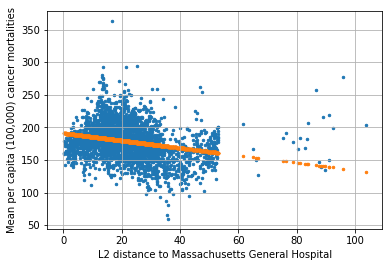

In [490]:
plt.scatter(X61, y, s=6)
plt.scatter(X61, lr.predict(X61), s=6)
plt.grid()
plt.xlabel("L2 distance to Massachusetts General Hospital", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('mgs_l2_actual_&_predicted_Y.png')

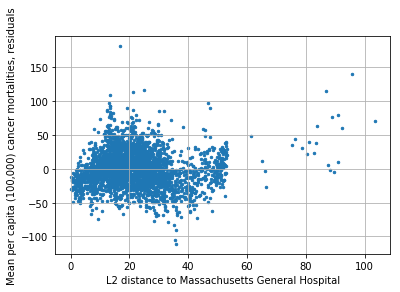

In [491]:
plt.scatter(X61, y - lr.predict(X61), s=6)
plt.grid()
plt.xlabel("L2 distance to Massachusetts General Hospital", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('mgs_l2_residuals.png')

In [492]:
X61.shape

(3047, 1)

In [493]:
dfx61 = pd.DataFrame(X61)
dfx61.head()

,0
0,13.993077
1,24.520478
2,6.567137
3,45.189896
4,23.433391


In [494]:
dfx61['mgs_l2_log'] = np.log(X61)

In [495]:
dfx61.head()

,0,mgs_l2_log
0,13.993077,2.638563
1,24.520478,3.199509
2,6.567137,1.882078
3,45.189896,3.810874
4,23.433391,3.154162


In [496]:
lr.fit(dfx61, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [497]:
lr.score(dfx61, y)

0.07722985793405135

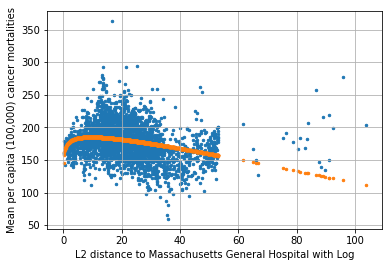

In [498]:
plt.scatter(X61, y, s=6) 
plt.scatter(X61, lr.predict(dfx61), s=6)
plt.grid()
plt.xlabel("L2 distance to Massachusetts General Hospital with Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('mgs_l2_log_actual_&_predicted_Y.png')

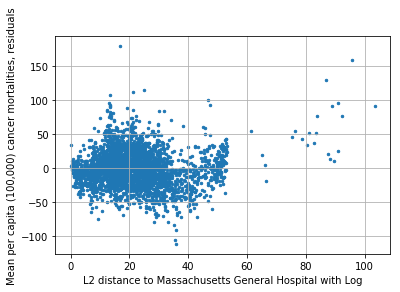

In [499]:
plt.scatter(X61, y - lr.predict(dfx61), s=6)
plt.grid()
plt.xlabel("L2 distance to Massachusetts General Hospital with Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('mgs_l2_log_residuals.png')

## 'nw_mem_l2': L2 distance to Northwestern Memorial Hospital

In [500]:
X['nw_mem_l2_log'] = np.log(X['nw_mem_l2'])

In [501]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [502]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [503]:
lr.score(X_test, y_test)

0.6355191612221571

The logarithmic version resulted in a decrease in accuracy, so it is dropped from the core feature set.

In [504]:
X = X.drop(columns = 'nw_mem_l2_log')

In [505]:
X['nw_mem_l2_sqrd'] = X['nw_mem_l2']**2

In [506]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [507]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [508]:
lr.score(X_test, y_test)

0.4977666638880677

The squared version also resulted in a decrease in accuracy, so it is dropped from X.

In [509]:
X = X.drop(columns = 'nw_mem_l2_sqrd')

## 'chi_l2': L2 distance of county centroids from Chicago

In [510]:
X['chi_l2_log'] = np.log(X['chi_l2'])

In [511]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [512]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [513]:
lr.score(X_test, y_test)

0.6355309287194242

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [514]:
X = X.drop(columns = 'chi_l2_log')

In [515]:
X['chi_l2_sqrd'] = X['chi_l2']**2

In [516]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [517]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [518]:
lr.score(X_test, y_test)

0.4977666702768686

The squared version also resulted in a decrease in accuracy, so it is dropped from X.

In [519]:
X = X.drop(columns = 'chi_l2_sqrd')

## 'nyc_l2': L2 distance of county centroids from New York City

In [520]:
X['nyc_l2_log'] = np.log(X['nyc_l2'])

In [521]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [522]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [523]:
lr.score(X_test, y_test)

0.6338447408954705

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [524]:
X = X.drop(columns = 'nyc_l2_log')

In [525]:
X['nyc_l2_sqrd'] = X['nyc_l2']**2

In [526]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [527]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [528]:
lr.score(X_test, y_test)

0.49776667477051406

The squared version also resulted in a decrease in accuracy, so it is dropped from X.

In [529]:
X = X.drop(columns = 'nyc_l2_sqrd')

## 'atlanta_l2': L2 distance of county centroids from Atlanta

In [530]:
X['atlanta_l2_log'] = np.log(X['atlanta_l2'])

In [531]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [532]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [533]:
lr.score(X_test, y_test)

0.6357206096566347

The logarithmic version resulted in an increase in accuracy, so it is added to the core feature set.

In [534]:
cancer['atlanta_l2_log'] = np.log(cancer['atlanta_l2'])

In [535]:
X['atlanta_l2_sqrd'] = X['atlanta_l2']**2

In [536]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [537]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [538]:
lr.score(X_test, y_test)

0.47694992995728036

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [539]:
X = X.drop(columns ='atlanta_l2_sqrd')

In [540]:
X65 = np.array(cancer['atlanta_l2'])
X65 = X65.reshape(-1, 1)

In [541]:
lr.fit(X65, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [542]:
lr.score(X65, y)

0.11673278980940427

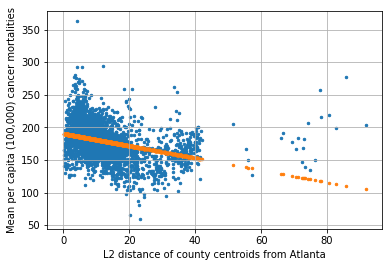

In [543]:
plt.scatter(X65, y, s=6)
plt.scatter(X65, lr.predict(X65), s=6)
plt.grid()
plt.xlabel("L2 distance of county centroids from Atlanta", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('atlanta_l2_actual_&_predicted_Y.png')

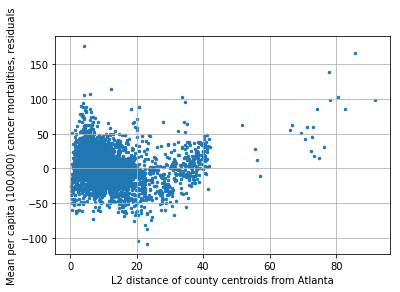

In [544]:
plt.scatter(X65, y - lr.predict(X65), s=6)
plt.grid()
plt.xlabel("L2 distance of county centroids from Atlanta", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('atlanta_l2_residuals.png')

In [545]:
X65.shape

(3047, 1)

In [546]:
dfx65 = pd.DataFrame(X65)
dfx65.head()

,0
0,1.992629
1,8.736329
2,9.519247
3,33.301152
4,12.619852


In [547]:
dfx65['atlanta_l2_log'] = np.log(X65)

In [548]:
dfx65.head()

,0,atlanta_l2_log
0,1.992629,0.689455
1,8.736329,2.167490
2,9.519247,2.253316
3,33.301152,3.505592
4,12.619852,2.535271


In [549]:
lr.fit(dfx65, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [550]:
lr.score(dfx65, y)

0.14326078877333936

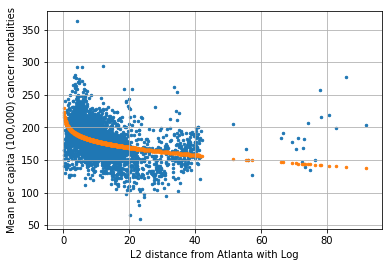

In [551]:
plt.scatter(X65, y, s=6) 
plt.scatter(X65, lr.predict(dfx65), s=6)
plt.grid()
plt.xlabel("L2 distance from Atlanta with Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('atlanta_l2_log_actual_&_predicted_Y.png')

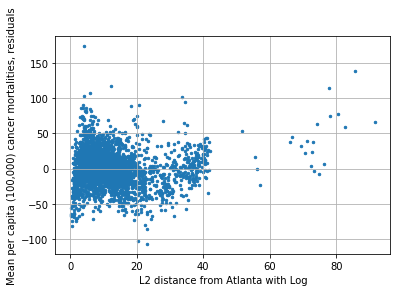

In [552]:
plt.scatter(X65, y - lr.predict(dfx65), s=6)
plt.grid()
plt.xlabel("L2 distance from Atlanta with Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('atlanta_l2_log_residuals.png')

## 'dallas_l2': L2 distance of county centroids from Dallas

In [553]:
X['dallas_l2_log'] = np.log(X['dallas_l2'])

In [554]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [555]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [556]:
lr.score(X_test, y_test)

0.6346805833724845

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [557]:
X = X.drop(columns = 'dallas_l2_log')

In [558]:
X['dallas_l2_sqrd'] = X['dallas_l2']**2

In [559]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [560]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [561]:
lr.score(X_test, y_test)

0.4769499389791032

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [562]:
X = X.drop(columns = 'dallas_l2_sqrd')

## 'denver_l2': L2 distance of county centroids from Denver

In [563]:
X['denver_l2_log'] = np.log(X['denver_l2'])

In [564]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [565]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [566]:
lr.score(X_test, y_test)

0.634363988233164

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [567]:
X = X.drop(columns = 'denver_l2_log')

In [568]:
X['denver_l2_sqrd'] = X['denver_l2']**2

In [569]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [570]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [571]:
lr.score(X_test, y_test)

0.4769499374777817

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [572]:
X = X.drop(columns = 'denver_l2_sqrd')

## 'los_ang_l2': L2 distance of county centroids from Los Angeles

In [573]:
X['los_ang_l2_log'] = np.log(X['los_ang_l2'])

In [574]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [575]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [576]:
lr.score(X_test, y_test)

0.6324722313768885

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [577]:
X = X.drop(columns = 'los_ang_l2_log')

In [578]:
X['los_ang_l2_sqrd'] = X['los_ang_l2']**2

In [579]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [580]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [581]:
lr.score(X_test, y_test)

0.4769499427580322

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [582]:
X = X.drop(columns = 'los_ang_l2_sqrd')

## 'seattle_l2': L2 distance of county centroids from Seattle

In [583]:
X['seattle_l2_log'] = np.log(X['seattle_l2'])

In [584]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [585]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [586]:
lr.score(X_test, y_test)

0.6350747382181079

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [587]:
X = X.drop(columns = 'seattle_l2_log')

In [588]:
X['seattle_l2_sqrd'] = X['seattle_l2']**2

In [589]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [590]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [591]:
lr.score(X_test, y_test)

0.47694992946116416

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [592]:
X = X.drop(columns = 'seattle_l2_sqrd')

## 'san_fran_l2': L2 distance of county centroids from San Francisco

In [593]:
X['san_fran_l2_log'] = np.log(X['san_fran_l2'])

In [594]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [595]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [596]:
lr.score(X_test, y_test)

0.6347669944205526

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [597]:
X = X.drop(columns = 'san_fran_l2_log')

In [598]:
X['san_fran_l2_sqrd'] = X['san_fran_l2']**2

In [599]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [600]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [601]:
lr.score(X_test, y_test)

0.4769499495507361

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [602]:
X = X.drop(columns = 'san_fran_l2_sqrd')

## 'onc_min_distsl1': L1 distance to the closest oncology hospital

In [603]:
X['onc_min_distsl1_log'] = np.log(X['onc_min_distsl1'])

In [604]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [605]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [606]:
lr.score(X_test, y_test)

0.6355512834273457

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [607]:
X = X.drop(columns = 'onc_min_distsl1_log')

In [608]:
X['onc_min_distsl1_sqrd'] = X['onc_min_distsl1']**2

In [609]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [610]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [611]:
lr.score(X_test, y_test)

0.6355118414050263

The squared version also resulted in a decrease in accuracy, so it is dropped from X.

In [612]:
X = X.drop(columns = 'onc_min_distsl1_sqrd')

## 'onc_min_distsl2': L2 distance to the closest oncology hospital

In [613]:
X['onc_min_distsl2_log'] = np.log(X['onc_min_distsl2'])

In [614]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [615]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [616]:
lr.score(X_test, y_test)

0.6354952846955652

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [617]:
X = X.drop(columns = 'onc_min_distsl2_log')

In [618]:
X['onc_min_distsl2_sqrd'] = X['onc_min_distsl2']**2

In [619]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [620]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [621]:
lr.score(X_test, y_test)

0.6286574706087644

The squared version decreased the accuracy, so it is dropped from X.

In [622]:
X = X.drop(columns = 'onc_min_distsl2_sqrd')

## 'city_min_distsl1': L1 distance to the closest major city

In [623]:
X['city_min_distsl1_log'] = np.log(X['city_min_distsl1'])

In [624]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [625]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [626]:
lr.score(X_test, y_test)

0.6335948328743646

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [627]:
X = X.drop(columns = 'city_min_distsl1_log')

In [628]:
X['city_min_distsl1_sqrd'] = X['city_min_distsl1']**2

In [629]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [630]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [631]:
lr.score(X_test, y_test)

0.6368619138269749

The squared version resulted in an increase in accuracy, so it is added to the core feature set.

In [632]:
cancer['city_min_distsl1_sqrd'] = cancer['city_min_distsl1']**2

In [633]:
X73 = np.array(cancer['city_min_distsl1'])
X73 = X73.reshape(-1, 1)

In [634]:
lr.fit(X73, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [635]:
lr.score(X73, y)

0.0027009362359354805

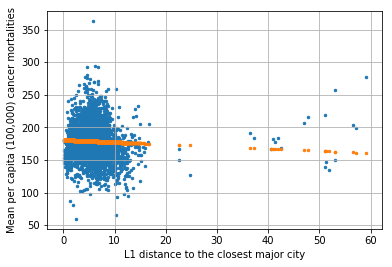

In [636]:
plt.scatter(X73, y, s=6)
plt.scatter(X73, lr.predict(X73), s=6)
plt.grid()
plt.xlabel("L1 distance to the closest major city", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('city_min_distsl1_actual_&_predicted_Y.png')

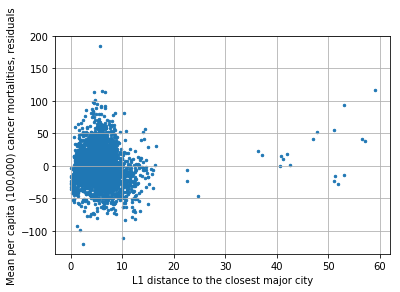

In [637]:
plt.scatter(X73, y - lr.predict(X73), s=6)
plt.grid()
plt.xlabel("L1 distance to the closest major city", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('city_min_distsl1_residuals.png')

In [638]:
X73.shape

(3047, 1)

In [639]:
dfx73 = pd.DataFrame(X73)
dfx73.head()

,0
0,2.413983
1,6.871166
2,4.698663
3,10.242447
4,7.397936


In [640]:
dfx73['city_min_distsl1_sqrd'] = X73**2

In [641]:
dfx73.head()

,0,city_min_distsl1_sqrd
0,2.413983,5.827314
1,6.871166,47.212922
2,4.698663,22.077434
3,10.242447,104.907721
4,7.397936,54.729457


In [642]:
lr.fit(dfx73, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [643]:
lr.score(dfx73, y)

0.011316654930426662

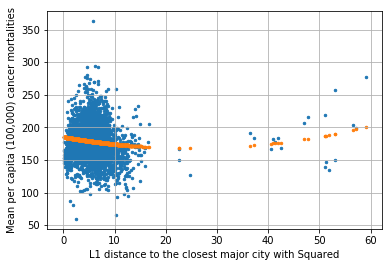

In [644]:
plt.scatter(X73, y, s=6) 
plt.scatter(X73, lr.predict(dfx73), s=6)
plt.grid()
plt.xlabel("L1 distance to the closest major city with Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('city_min_distsl1_sqrd_actual_&_predicted_Y.png')

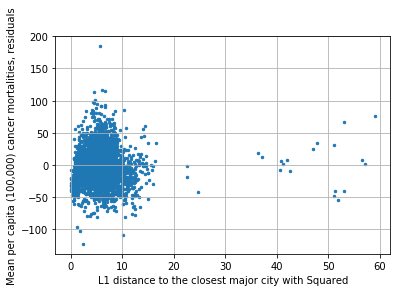

In [645]:
plt.scatter(X73, y - lr.predict(dfx73), s=6)
plt.grid()
plt.xlabel("L1 distance to the closest major city with Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('city_min_distsl1_sqrd_residuals.png')

## 'city_min_distsl2': L2 distance to the closest major city

In [646]:
X['city_min_distsl2_log'] = np.log(X['city_min_distsl2'])

In [647]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [648]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [649]:
lr.score(X_test, y_test)

0.6355487146591362

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [650]:
X = X.drop(columns = 'city_min_distsl2_log')

In [651]:
X['city_min_distsl2_sqrd'] = X['city_min_distsl2']**2

In [652]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [653]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [654]:
lr.score(X_test, y_test)

0.6355760096977636

The squared version also resulted in a decrease in accuracy, so it is dropped from X.

In [655]:
X = X.drop(columns = 'city_min_distsl2_sqrd')

## 'sc_min_dists_l1': L1 distance to the closest EPA Superfund Cleanup Site

In [656]:
X['sc_min_dists_l1_log'] = np.log(X['sc_min_dists_l1'])

In [657]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [658]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [659]:
lr.score(X_test, y_test)

0.6371792299874353

The logarithmic version resulted in an increase in accuracy, so it is added to the core feature set.

In [660]:
cancer['sc_min_dists_l1_log'] = np.log(cancer['sc_min_dists_l1'])

In [661]:
X['sc_min_dists_l1_sqrd'] = X['sc_min_dists_l1']**2

In [662]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [663]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [664]:
lr.score(X_test, y_test)

0.6366016360370523

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [665]:
X = X.drop(columns = 'sc_min_dists_l1_sqrd')

In [666]:
X75 = np.array(cancer['sc_min_dists_l1'])
X75 = X75.reshape(-1, 1)

In [667]:
lr.fit(X75, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [668]:
lr.score(X75, y)

0.007499901205857973

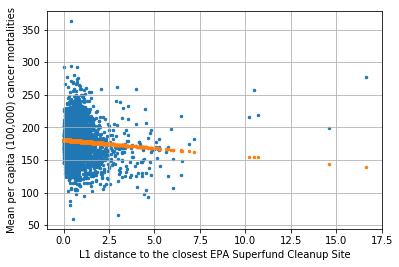

In [669]:
plt.scatter(X75, y, s=6)
plt.scatter(X75, lr.predict(X75), s=6)
plt.grid()
plt.xlabel("L1 distance to the closest EPA Superfund Cleanup Site", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('sc_min_dists_l1_actual_&_predicted_Y.png')

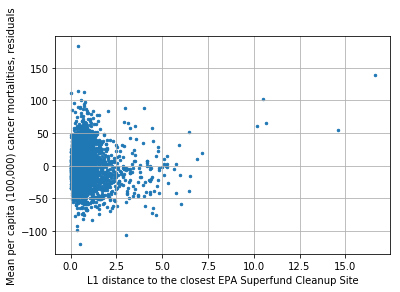

In [670]:
plt.scatter(X75, y - lr.predict(X75), s=6)
plt.grid()
plt.xlabel("L1 distance to the closest EPA Superfund Cleanup Site", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('sc_min_dists_l1_residuals.png')

In [671]:
X75.shape

(3047, 1)

In [672]:
dfx75 = pd.DataFrame(X75)
dfx75.head()

,0
0,0.509339
1,0.249904
2,1.166387
3,0.783103
4,0.592789


In [673]:
dfx75['sc_min_dists_l1_log'] = np.log(X75)

In [674]:
dfx75.head()

,0,sc_min_dists_l1_log
0,0.509339,-0.674641
1,0.249904,-1.386678
2,1.166387,0.153911
3,0.783103,-0.244491
4,0.592789,-0.522917


In [675]:
lr.fit(dfx75, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [676]:
lr.score(dfx75, y)

0.0075000717523494576

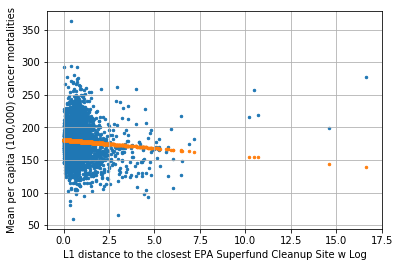

In [677]:
plt.scatter(X75, y, s=6) 
plt.scatter(X75, lr.predict(dfx75), s=6)
plt.grid()
plt.xlabel("L1 distance to the closest EPA Superfund Cleanup Site w Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('sc_min_dists_l1_log_actual_&_predicted_Y.png')

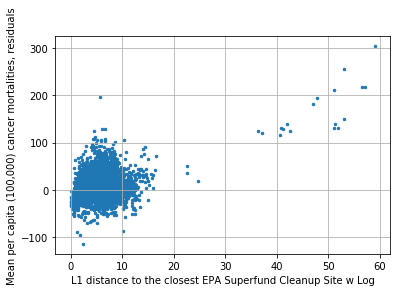

In [678]:
plt.scatter(X73, y - lr.predict(dfx73), s=6)
plt.grid()
plt.xlabel("L1 distance to the closest EPA Superfund Cleanup Site w Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('sc_min_dists_l1_log_residuals.png')

## 'sc_min_dists_l2': L2 distance to the closest EPA Superfund Cleanup Site

In [679]:
X['sc_min_dists_l2_log'] = np.log(X['sc_min_dists_l2'])

In [680]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [681]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [682]:
lr.score(X_test, y_test)

0.6357968971980545

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [683]:
X = X.drop(columns = 'sc_min_dists_l2_log')

In [684]:
X['sc_min_dists_l2_sqrd'] = X['sc_min_dists_l2']**2

In [685]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [686]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [687]:
lr.score(X_test, y_test)

0.6344140493823287

The squared version also resulted in a decrease in accuracy, so it is dropped from X.

In [688]:
X = X.drop(columns = 'sc_min_dists_l2_sqrd')

## 'PCT_LACCESS_POP10': Population, low access to store (%), 2010

Due to zero values in 'PCT_LACCESS_POP10', a log version cannot be created.

In [689]:
X['PCT_LACCESS_POP10_sqrd'] = X['PCT_LACCESS_POP10']**2

In [690]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [691]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [692]:
lr.score(X_test, y_test)

0.6371101370767546

The squared version decreased accuracy, so it was dropped from the feature set.

In [693]:
X = X.drop(columns = 'PCT_LACCESS_POP10_sqrd')

## 'PCT_LACCESS_LOWI10': Low income & low access to store (%), 2010

Due to zero values in 'PCT_LACCESS_LOWI10', a log version cannot be created.

In [694]:
X['PCT_LACCESS_LOWI10_sqrd'] = X['PCT_LACCESS_LOWI10']**2

In [695]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [696]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [697]:
lr.score(X_test, y_test)

0.6361022203791125

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [698]:
X = X.drop(columns = 'PCT_LACCESS_LOWI10_sqrd')

## 'PCT_LACCESS_CHILD10': Children, low access to store (%), 2010

Due to zero values in 'PCT_LACCESS_CHILD10', a log version cannot be created.

In [699]:
X['PCT_LACCESS_CHILD10_sqrd'] = X['PCT_LACCESS_CHILD10']**2

In [700]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [701]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [702]:
lr.score(X_test, y_test)

0.6372641363920766

The squared version resulted in an increase in accuracy, so it added to the core feature set.

In [703]:
cancer['PCT_LACCESS_CHILD10_sqrd'] = cancer['PCT_LACCESS_CHILD10']**2

In [704]:
X79 = np.array(cancer['PCT_LACCESS_CHILD10'])
X79 = X79.reshape(-1, 1)

In [705]:
lr.fit(X79, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [706]:
lr.score(X79, y)

0.04691534815834508

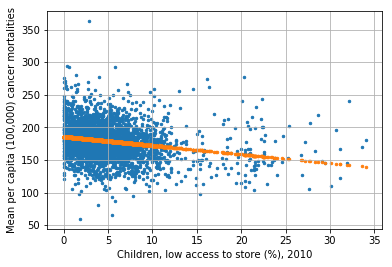

In [707]:
plt.scatter(X79, y, s=6)
plt.scatter(X79, lr.predict(X79), s=6)
plt.grid()
plt.xlabel("Children, low access to store (%), 2010", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PCT_LACCESS_CHILD10_actual_&_predicted_Y.png')

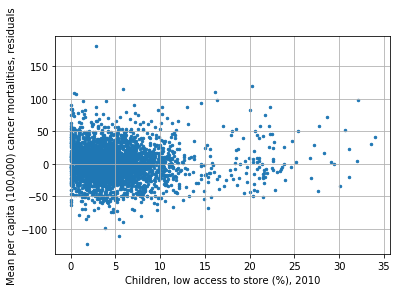

In [708]:
plt.scatter(X79, y - lr.predict(X79), s=6)
plt.grid()
plt.xlabel("Children, low access to store (%), 2010", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PCT_LACCESS_CHILD10_residuals.png')

In [709]:
X79.shape

(3047, 1)

In [710]:
dfx79 = pd.DataFrame(X79)
dfx79.head()

,0
0,7.030320
1,0.493074
2,0.718831
3,4.945663
4,1.811461


In [711]:
dfx79['PCT_LACCESS_CHILD10_sqrd'] = X79**2

In [712]:
dfx79.head()

,0,PCT_LACCESS_CHILD10_sqrd
0,7.030320,49.425404
1,0.493074,0.243122
2,0.718831,0.516719
3,4.945663,24.459579
4,1.811461,3.281391


In [713]:
lr.fit(dfx79, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [714]:
lr.score(dfx79, y)

0.057745947767899215

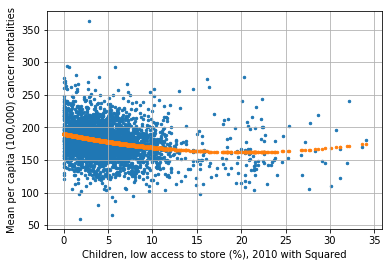

In [715]:
plt.scatter(X79, y, s=6) 
plt.scatter(X79, lr.predict(dfx79), s=6)
plt.grid()
plt.xlabel("Children, low access to store (%), 2010 with Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PCT_LACCESS_CHILD10_sqrd_actual_&_predicted_Y.png')

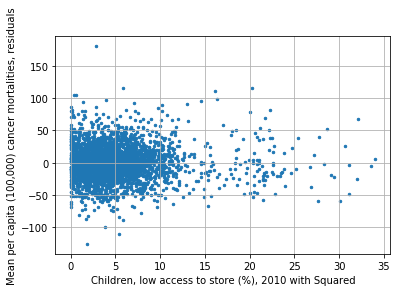

In [716]:
plt.scatter(X79, y - lr.predict(dfx79), s=6)
plt.grid()
plt.xlabel("Children, low access to store (%), 2010 with Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PCT_LACCESS_CHILD10_sqrd_residuals.png')

## 'PCT_LACCESS_SENIORS10': Seniors, low access to store (%), 2010

Due to zero values in 'PCT_LACCESS_SENIORS10', a log version cannot be created.

In [717]:
X['PCT_LACCESS_SENIORS10_sqrd'] = X['PCT_LACCESS_SENIORS10']**2

In [718]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [719]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [720]:
lr.score(X_test, y_test)

0.6361941599931092

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [721]:
X = X.drop(columns = 'PCT_LACCESS_SENIORS10_sqrd')

## 'PCT_LACCESS_HHNV10': Households, no car & low access to store (%), 2010

Due to zero values in 'PCT_LACCESS_HHNV10', a log version cannot be created.

In [722]:
X['PCT_LACCESS_HHNV10_sqrd'] = X['PCT_LACCESS_HHNV10']**2

In [723]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [724]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [725]:
lr.score(X_test, y_test)

0.6373532323493116

The squared version increased accuracy, so it is added to the core feature set.

In [726]:
cancer['PCT_LACCESS_HHNV10_sqrd'] = cancer['PCT_LACCESS_HHNV10']**2

In [727]:
X81 = np.array(cancer['PCT_LACCESS_HHNV10'])
X81 = X81.reshape(-1, 1)

In [728]:
lr.fit(X81, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [729]:
lr.score(X81, y)

0.09851677343727672

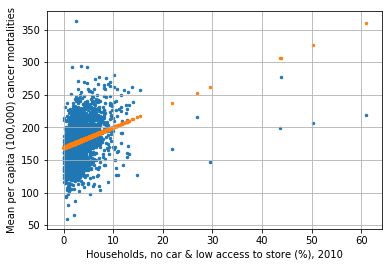

In [730]:
plt.scatter(X81, y, s=6)
plt.scatter(X81, lr.predict(X81), s=6)
plt.grid()
plt.xlabel("Households, no car & low access to store (%), 2010", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PCT_LACCESS_HHNV10_actual_&_predicted_Y.png')

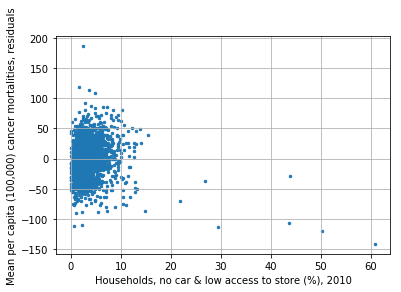

In [731]:
plt.scatter(X81, y - lr.predict(X81), s=6)
plt.grid()
plt.xlabel("Households, no car & low access to store (%), 2010", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PCT_LACCESS_HHNV10_residuals.png')

In [732]:
X81.shape

(3047, 1)

In [733]:
dfx81 = pd.DataFrame(X81)
dfx81.head()

,0
0,6.049947
1,1.797018
2,7.706417
3,0.580236
4,1.876358


In [734]:
dfx81['PCT_LACCESS_HHNV10_sqrd'] = X81**2

In [735]:
dfx81.head()

,0,PCT_LACCESS_HHNV10_sqrd
0,6.049947,36.601854
1,1.797018,3.229274
2,7.706417,59.388869
3,0.580236,0.336674
4,1.876358,3.520720


In [736]:
lr.fit(dfx81, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [737]:
lr.score(dfx81, y)

0.14232745645603295

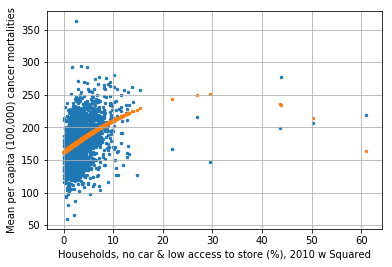

In [738]:
plt.scatter(X81, y, s=6) 
plt.scatter(X81, lr.predict(dfx81), s=6)
plt.grid()
plt.xlabel("Households, no car & low access to store (%), 2010 w Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PCT_LACCESS_HHNV10_sqrd_actual_&_predicted_Y.png')

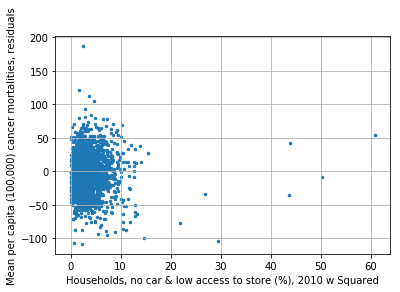

In [739]:
plt.scatter(X81, y - lr.predict(dfx81), s=6)
plt.grid()
plt.xlabel("Households, no car & low access to store (%), 2010 w Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PCT_LACCESS_HHNV10_sqrd_residuals.png')

In [740]:
cancer.to_csv('cancer_ml5.csv')